In [1]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
'''
# Display basic info
print(train.info())
print(test.info())
'''

/var/folders/sw/w48z_b8d35d98wwyn_4jj__m0000gn/T/ipykernel_7924/2150920188.py:7: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Train.csv')
/var/folders/sw/w48z_b8d35d98wwyn_4jj__m0000gn/T/ipykernel_7924/2150920188.py:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('Test.csv')


'\n# Display basic info\nprint(train.info())\nprint(test.info())\n'

In [3]:
new_column_names = {
    "fecha_dato": "Data_Partition_Date",
    "ncodpers": "Customer_ID",
    "ind_empleado": "Employee_Status",
    "pais_residencia": "Country_of_Residence",
    "sexo": "Gender",
    "age": "Age",
    "fecha_alta": "Account_Start_Date",
    "ind_nuevo": "New_Customer_Indicator",
    "antiguedad": "Seniority_Months",
    "indrel": "Customer_Relationship_Type",
    "ult_fec_cli_1t": "Last_Primary_Customer_Date",
    "indrel_1mes": "Initial_Customer_Type",
    "tiprel_1mes": "Initial_Relationship_Type",
    "indresi": "Residence_Indicator",
    "indext": "Foreigner_Indicator",
    "conyuemp": "Employee_Spouse_Indicator",
    "canal_entrada": "Joining_Channel",
    "indfall": "Deceased_Indicator",
    "tipodom": "Address_Type",
    "cod_prov": "Province_Code",
    "nomprov": "Province_Name",
    "ind_actividad_cliente": "Customer_Activity_Indicator",
    "renta": "Household_Income",
    "segmento": "Customer_Segment",
    "ind_ahor_fin_ult1": "Savings_Account",
    "ind_aval_fin_ult1": "Guarantee_Account",
    "ind_cco_fin_ult1": "Current_Account",
    "ind_cder_fin_ult1": "Derivative_Account",
    "ind_cno_fin_ult1": "Payroll_Account",
    "ind_ctju_fin_ult1": "Junior_Account",
    "ind_ctma_fin_ult1": "Mas_Particular_Account",
    "ind_ctop_fin_ult1": "Particular_Account",
    "ind_ctpp_fin_ult1": "Particular_Plus_Account",
    "ind_deco_fin_ult1": "Short_term_Deposits",
    "ind_deme_fin_ult1": "Medium_term_Deposits",
    "ind_dela_fin_ult1": "Long_term_Deposits",
    "ind_ecue_fin_ult1": "E_Account",
    "ind_fond_fin_ult1": "Funds_Account",
    "ind_hip_fin_ult1": "Mortgage_Account",
    "ind_plan_fin_ult1": "Pension_Account",
    "ind_pres_fin_ult1": "Loan_Account",
    "ind_reca_fin_ult1": "Tax_Account",
    "ind_tjcr_fin_ult1": "Credit_Card_Account",
    "ind_valo_fin_ult1": "Securities_Account",
    "ind_viv_fin_ult1": "Home_Account",
    "ind_nomina_ult1": "Payroll_Account",
    "ind_nom_pens_ult1": "Pension_Account",
    "ind_recibo_ult1": "Direct_Debit"
}

# Rename the columns in the DataFrame
train.rename(columns=new_column_names, inplace=True)

In [4]:
new_column_names = {
    "fecha_dato": "Data_Partition_Date",
    "ncodpers": "Customer_ID",
    "ind_empleado": "Employee_Status",
    "pais_residencia": "Country_of_Residence",
    "sexo": "Gender",
    "age": "Age",
    "fecha_alta": "Account_Start_Date",
    "ind_nuevo": "New_Customer_Indicator",
    "antiguedad": "Seniority_Months",
    "indrel": "Customer_Relationship_Type",
    "ult_fec_cli_1t": "Last_Primary_Customer_Date",
    "indrel_1mes": "Initial_Customer_Type",
    "tiprel_1mes": "Initial_Relationship_Type",
    "indresi": "Residence_Indicator",
    "indext": "Foreigner_Indicator",
    "conyuemp": "Employee_Spouse_Indicator",
    "canal_entrada": "Joining_Channel",
    "indfall": "Deceased_Indicator",
    "tipodom": "Address_Type",
    "cod_prov": "Province_Code",
    "nomprov": "Province_Name",
    "ind_actividad_cliente": "Customer_Activity_Indicator",
    "renta": "Household_Income",
    "segmento": "Customer_Segment"
}

# Rename the columns in the DataFrame
test.rename(columns=new_column_names, inplace=True)

# Griffin Comment: For our own convenience, we are going to translate each column from Spanish to English. We both did this in our own way, but our objective– that is, to make the data more readable– is the same.

In [5]:
# Convert the date_column to datetime dtype
train['Data_Partition_Date'] = pd.to_datetime(train['Data_Partition_Date'])

# Check the data type after conversion
print(train['Data_Partition_Date'].dtype)  # Output: datetime64[ns]

datetime64[ns]


In [6]:
# Convert the date_column to datetime dtype
test['Data_Partition_Date'] = pd.to_datetime(test['Data_Partition_Date'])

# Check the data type after conversion
print(test['Data_Partition_Date'].dtype)  # Output: datetime64[ns]

datetime64[ns]


In [7]:
# Convert Customer_ID to numeric (integer) type
train['Customer_ID_numeric'] = pd.to_numeric(train['Customer_ID'], errors='coerce')

# Find the min and max Customer_ID as integers
min_id = train['Customer_ID_numeric'].min()
max_id = train['Customer_ID_numeric'].max()

print("Min Customer_ID (as integer):", min_id)
print("Max Customer_ID (as integer):", max_id)

Min Customer_ID (as integer): 15889
Max Customer_ID (as integer): 1553689


In [8]:
# Check for missing values in the train DataFrame
print("Missing Values in Train DataFrame:")
print(train.isnull().sum())

# Check for missing values in the test DataFrame
print("\nMissing Values in Test DataFrame:")
print(test.isnull().sum())

Missing Values in Train DataFrame:
Data_Partition_Date                   0
Customer_ID                           0
Employee_Status                   27734
Country_of_Residence              27734
Gender                            27804
Age                                   0
Account_Start_Date                27734
New_Customer_Indicator            27734
Seniority_Months                      0
Customer_Relationship_Type        27734
Last_Primary_Customer_Date     13622516
Initial_Customer_Type            149781
Initial_Relationship_Type        149781
Residence_Indicator               27734
Foreigner_Indicator               27734
Employee_Spouse_Indicator      13645501
Joining_Channel                  186126
Deceased_Indicator                27734
Address_Type                      27735
Province_Code                     93591
Province_Name                     93591
Customer_Activity_Indicator       27734
Household_Income                2794375
Customer_Segment                 189368
Savin

In [9]:
# Going back to what we worked on last week, let's gather as much information about the data as possible. Last week, Phanindra worked on gathering informartion about the data on a column-by-column analysis, whereas I worked to find inconsistencies, outliers, and missing values more broadly and then apply imputation techniques to fill in the missing values. This week, we need to combine both of our strategies in order to make sure we are using the data as accurately as possible and thus create a more comprehensive analysis of the data. 

# One of the most difficult aspects of our data is the language barriers. Let's first separate the categorical and numerical columns, and then look through the categorical values and make any translations necessary. 

# Separate the categorical and numerical columns
categorical_columns_train = train.select_dtypes(include=['object']).columns
numerical_columns_train = train.select_dtypes(exclude=['object']).columns
categorical_columns_test = test.select_dtypes(include=['object']).columns
numerical_columns_test = test.select_dtypes(exclude=['object']).columns
print(categorical_columns_train)
print(numerical_columns_train)
print(categorical_columns_test)
print(numerical_columns_test)

Index(['Employee_Status', 'Country_of_Residence', 'Gender', 'Age',
       'Account_Start_Date', 'Seniority_Months', 'Last_Primary_Customer_Date',
       'Initial_Customer_Type', 'Initial_Relationship_Type',
       'Residence_Indicator', 'Foreigner_Indicator',
       'Employee_Spouse_Indicator', 'Joining_Channel', 'Deceased_Indicator',
       'Province_Name', 'Customer_Segment'],
      dtype='object')
Index(['Data_Partition_Date', 'Customer_ID', 'New_Customer_Indicator',
       'Customer_Relationship_Type', 'Address_Type', 'Province_Code',
       'Customer_Activity_Indicator', 'Household_Income', 'Savings_Account',
       'Guarantee_Account', 'Current_Account', 'Derivative_Account',
       'Payroll_Account', 'Junior_Account', 'Mas_Particular_Account',
       'Particular_Account', 'Particular_Plus_Account', 'Short_term_Deposits',
       'Medium_term_Deposits', 'Long_term_Deposits', 'E_Account',
       'Funds_Account', 'Mortgage_Account', 'Pension_Account', 'Loan_Account',
       'Tax_Acc

In [10]:
# Out of the categorical columns, let's evaluate if there's a need to translate any of the values.
print(train['Employee_Status'].value_counts())

# Translate the values in the Employee_Status column
train['Employee_Status'] = train['Employee_Status'].map({'N': 'Not employee', 'B': 'Ex employee', 'F': 'Filial', 'A': 'Active Employee', 'S': 'Bad'})

# Let's print and then remove all the missing values in the column
print(train['Employee_Status'].value_counts())
print("Null Values in Employee_Status Column:", train['Employee_Status'].isnull().sum())

# Lets treat all values that come back as 'S' as missing values, and drop them since there are only 17. 
train = train[train['Employee_Status'] != 'Null']
print(train['Employee_Status'].value_counts())

# Print the null values in the Employee_Status column
print("Null Values in Employee_Status Column:", train['Employee_Status'].isnull().sum())

# There are still 27734 missing values in the Employee_Status column. Let's impute these missing values with the mode of the column.
imputer = SimpleImputer(strategy='most_frequent')
train['Employee_Status'] = imputer.fit_transform(train['Employee_Status'].values.reshape(-1, 1))

# Print the null values in the Employee_Status column
print("Null Values in Employee_Status Column:", train['Employee_Status'].isnull().sum())


Employee_Status
N    13610977
B        3566
F        2523
A        2492
S          17
Name: count, dtype: int64
Employee_Status
Not employee       13610977
Ex employee            3566
Filial                 2523
Active Employee        2492
Bad                      17
Name: count, dtype: int64
Null Values in Employee_Status Column: 27734
Employee_Status
Not employee       13610977
Ex employee            3566
Filial                 2523
Active Employee        2492
Bad                      17
Name: count, dtype: int64
Null Values in Employee_Status Column: 27734


ValueError: 2

In [8]:
# Out of the categorical columns, let's evaluate if there's a need to translate any of the values.
print(train['Employee_Status'].value_counts())

# Translate the values in the Employee_Status column
train['Employee_Status'] = train['Employee_Status'].map({'N': 'Not employee', 'B': 'Ex employee', 'F': 'Filial', 'A': 'Active Employee', 'S': 'Null'})
# Lets treat all values that come back as 'S' as missing values, and drop them since there are only 17. 
train = train[train['Employee_Status'] != 'Null']
print(train['Employee_Status'].value_counts())

# Print the null values in the Employee_Status column
print("Null Values in Employee_Status Column:", train['Employee_Status'].isnull().sum())

Employee_Status
N    13610977
B        3566
F        2523
A        2492
S          17
Name: count, dtype: int64
Employee_Status
Not employee       13610977
Ex employee            3566
Filial                 2523
Active Employee        2492
Name: count, dtype: int64
Null Values in Employee_Status Column: 27734


In [9]:
# Now let's move on and inspect the Country_of_Residence column
print(train['Country_of_Residence'].value_counts())

# Since there are so 118 different companies represented in the data, we will not translate them individually. We will instead leave them in their abbreviated form, and if necessary, we can translate them later.

# Can we print the countries who have the highest count
print(train['Country_of_Residence'].value_counts().head(10))

Country_of_Residence
ES    13553693
FR        5161
AR        4835
DE        4625
GB        4605
        ...   
ZW          11
DJ          11
JM          11
BM           6
MT           2
Name: count, Length: 118, dtype: int64
Country_of_Residence
ES    13553693
FR        5161
AR        4835
DE        4625
GB        4605
US        3651
CO        3526
IT        2947
RO        2931
MX        2573
Name: count, dtype: int64


In [10]:
# Now let's inspect 'Gender' column
print(train['Gender'].value_counts())

# Let's translate H to Male and V to Female to make it easier to read
train['Gender'] = train['Gender'].map({'H': 'Male', 'V': 'Female'})
print(train['Gender'].value_counts())

Gender
V    7424252
H    6195236
Name: count, dtype: int64
Gender
Female    7424252
Male      6195236
Name: count, dtype: int64


In [11]:
# Let's inspect the 'Account_Start_Date' column
print(train['Account_Start_Date'].value_counts())

# This is a misidentified column. It should be a date column, but it is being read as an object. We will convert it to a datetime column.
train['Account_Start_Date'] = pd.to_datetime(train['Account_Start_Date'], errors='coerce')

# Let's do the same for 'Age' column
train['Age'] = pd.to_numeric(train['Age'], errors='coerce')


Account_Start_Date
2014-07-28    57389
2014-10-03    54287
2014-08-04    45746
2013-10-14    40804
2013-08-03    33414
              ...  
2014-04-27       11
2015-05-31        9
2014-05-01        7
2010-07-04        4
2009-12-25        4
Name: count, Length: 6756, dtype: int64


In [12]:
# Initial Customer Type
print(train['Initial_Customer_Type'].value_counts())

# Translate the values in the Initial_Customer_Type column
train['Initial_Customer_Type'] = train['Initial_Customer_Type'].map({'1.0': 'Primary', '1': 'Primary', '2.0': 'Co-owner', '2': 'Co-owner', '3.0': 'Former Primary', '3': 'Former Primary', '4.0': 'Former Co-owner', '4': 'Former Co-owner', 'P': 'Potential', '3.0': 'Primary', '2.0': 'Co-owner', '4.0': 'Former Co-owner', '1.0': 'Former Primary', 'P': 'Potential', '3': 'Primary', '2': 'Co-owner', '4': 'Former Co-owner', '1': 'Former Primary'})
print(train['Initial_Customer_Type'].value_counts())

Initial_Customer_Type
1.0    7277596
1.0    4017740
1      2195328
3.0       1804
3.0       1409
3         1137
P          874
2          483
2.0        479
2.0        355
4.0        143
4.0         93
4           70
Name: count, dtype: int64
Initial_Customer_Type
Former Primary     6213068
Primary               2941
Co-owner               962
Potential              874
Former Co-owner        213
Name: count, dtype: int64


In [13]:
# Initial Relationship Type
print(train['Initial_Relationship_Type'].value_counts())

# Translate the values in the Initial_Relationship_Type column
train['Initial_Relationship_Type'] = train['Initial_Relationship_Type'].map({'A': 'Active', 'I': 'Inactive', 'P': 'Former', 'R': 'Potential'})
print(train['Initial_Relationship_Type'].value_counts())

Initial_Relationship_Type
I    7304875
A    6187106
P       4656
R        870
N          4
Name: count, dtype: int64
Initial_Relationship_Type
Inactive     7304875
Active       6187106
Former          4656
Potential        870
Name: count, dtype: int64


In [14]:
# Residence Indicator
print(train['Residence_Indicator'].value_counts())

# Translate the values in the Residence_Indicator column
train['Residence_Indicator'] = train['Residence_Indicator'].map({'S': 'Yes', 'N': 'No'})
print(train['Residence_Indicator'].value_counts())

Residence_Indicator
S    13553694
N       65864
Name: count, dtype: int64
Residence_Indicator
Yes    13553694
No        65864
Name: count, dtype: int64


In [15]:
# Foreigner Indicator
print(train['Foreigner_Indicator'].value_counts())

# Translate the values in the Foreigner_Indicator column
train['Foreigner_Indicator'] = train['Foreigner_Indicator'].map({'S': 'Yes', 'N': 'No'})
print(train['Foreigner_Indicator'].value_counts())

Foreigner_Indicator
N    12974822
S      644736
Name: count, dtype: int64
Foreigner_Indicator
No     12974822
Yes      644736
Name: count, dtype: int64


In [16]:
# Employee Spouse Indicator
print(train['Employee_Spouse_Indicator'].value_counts())

# Translate the values in the Employee_Spouse_Indicator column
train['Employee_Spouse_Indicator'] = train['Employee_Spouse_Indicator'].map({'S': 'Yes', 'N': 'No'})
print(train['Employee_Spouse_Indicator'].value_counts())


Employee_Spouse_Indicator
N    1791
S      17
Name: count, dtype: int64
Employee_Spouse_Indicator
No     1791
Yes      17
Name: count, dtype: int64


In [17]:
# Joining Channel
print(train['Joining_Channel'].value_counts())

# Since there are so many different channels, we will not translate them individually. We will instead leave them in their abbreviated form, and if necessary, we can translate them later.

Joining_Channel
KHE    4055270
KAT    3268192
KFC    3098360
KHQ     591039
KFA     409669
        ...   
KGN         17
KDL         11
025         11
KHS          5
KHR          1
Name: count, Length: 162, dtype: int64


In [18]:
# Deceased Indicator
print(train['Deceased_Indicator'].value_counts())

# Translate the values in the Deceased_Indicator column
train['Deceased_Indicator'] = train['Deceased_Indicator'].map({'S': 'Yes', 'N': 'No'})
print(train['Deceased_Indicator'].value_counts())


Deceased_Indicator
N    13584796
S       34762
Name: count, dtype: int64
Deceased_Indicator
No     13584796
Yes       34762
Name: count, dtype: int64


In [19]:
# Address Type
print(train['Address_Type'].value_counts())

# Translate the values in the Address_Type column
train['Address_Type'] = train['Address_Type'].map({1: 'Primary Address', '1': 'Primary Address'})
print(train['Address_Type'].value_counts())


Address_Type
1.0    13619557
Name: count, dtype: int64
Address_Type
Primary Address    13619557
Name: count, dtype: int64


In [41]:
# Province Name
print(train['Province_Name'].value_counts())

# There is no need to translate the values in the Province_Name column


Province_Name
MADRID                    4409600
BARCELONA                 1275219
VALENCIA                   682304
SEVILLA                    605164
CORUÑA, A                  429322
MURCIA                     396759
MALAGA                     367023
ZARAGOZA                   342543
ALICANTE                   313397
CADIZ                      294684
PONTEVEDRA                 280026
ASTURIAS                   265749
VALLADOLID                 238259
PALMAS, LAS                235700
BADAJOZ                    192996
BIZKAIA                    185888
TOLEDO                     183067
GRANADA                    178562
SALAMANCA                  164238
CANTABRIA                  155706
CORDOBA                    144679
CACERES                    129912
BALEARS, ILLES             124933
HUELVA                     122283
CIUDAD REAL                119390
ALBACETE                   114128
CASTELLON                  104295
TARRAGONA                  100115
BURGOS                      97188


In [20]:
# Customer Segment
print(train['Customer_Segment'].value_counts())

# Translate the values in the Customer_Segment column
train['Customer_Segment'] = train['Customer_Segment'].map({'01 - TOP': 'VIP', '02 - PARTICULARES': 'Individuals', '03 - UNIVERSITARIO': 'College Graduates'})
print(train['Customer_Segment'].value_counts())


Customer_Segment
02 - PARTICULARES     7960206
03 - UNIVERSITARIO    4935579
01 - TOP               562139
Name: count, dtype: int64
Customer_Segment
Individuals          7960206
College Graduates    4935579
VIP                   562139
Name: count, dtype: int64


In [43]:
# Alright, now that we are done with the catergorical columns, let's move on to the numerical columns.

# Let's start by looking at skewness of the numerical columns– like we did last week
# Select only numeric columns from the train DataFrame
numeric_train = train.select_dtypes(include=['number'])

# Select only numeric columns from the test DataFrame
numeric_test = test.select_dtypes(include=['number'])

# Calculate skewness for each numeric column in the train DataFrame
train_skewness = numeric_train.skew()

# Calculate skewness for each numeric column in the test DataFrame
test_skewness = numeric_test.skew()

# Print skewness values
print("Skewness in Train DataFrame:")
print(train_skewness)

print("\nSkewness in Test DataFrame:")
print(test_skewness)

Skewness in Train DataFrame:
Customer_ID                     -0.293747
Age                              0.804207
New_Customer_Indicator           3.721909
Customer_Relationship_Type      23.373776
Province_Code                   -0.124528
Customer_Activity_Indicator      0.169362
Household_Income                53.257206
Savings_Account                 98.858543
Guarantee_Account              207.809278
Current_Account                 -0.654378
Derivative_Account              50.354373
Payroll_Account                  3.074725
Junior_Account                  10.127175
Mas_Particular_Account           9.991027
Particular_Account               2.213494
Particular_Plus_Account          4.487410
Short_term_Deposits             23.647367
Medium_term_Deposits            24.475570
Long_term_Deposits               4.507626
E_Account                        3.029149
Funds_Account                    7.149396
Mortgage_Account                12.918353
Pension_Account                 10.298012
Loan_

In [44]:

# Now let's look into some of the best ways to 'clean' the data

# First, let's analyze the mean/median/mode/Model based approach to handle NA value, and when to use each one 

# For 'Mean Inputation Approach', let's call it, we can replace the NA value with the mean of the column. This however, is only suitable for columns with strictly numerical values, and low skewness, or close to a normal distribution. 
# BASICALLY, we want to tailor this approach to columns with a HIGH number of missing values AND LOW skewness. 
'''
From above list of columns with missing values, we can see that the columns with missing values are:

for train data set:

employee_index                                     27734
country_of_residence                               27734
sex                                                27804
holder_start_date                                  27734
new_customer_index                                 27734
primary                                            27734
last_date_as_primary                            13622516
customer_type_at_beginning_of_month               149781
customer_relation_type_at_beginning_of_month      149781
residence_index                                    27734
foreigner_index                                    27734
spouse_index                                    13645501
channel                                           186126
deceased_index                                     27734
address_type                                       27735
province_code                                      93591
province_name                                      93591
activity_index                                     27734
gross_income                                     2794375
segmentation                                      189368
payroll                                            16063
pensions                                           16063

for test data set:
last_date_as_primary                            927932
customer_type_at_beginning_of_month                 23
customer_relation_type_at_beginning_of_month        23
spouse_index                                    929511
channel                                           2081
province_code                                     3996
province_name                                     3996
segmentation                                      2248


From the above list of skewness (let's consider high skewness to be out of the range of -1 to 1), we can see that the columns with low skewness are: 
customer_code                                    -0.293747
age                                               0.804207
channel                                           0.082240
address_type                                      0.000000
province_code                                    -0.124528
activity_index                                    0.169362
current_accounts                                 -0.654378

customer_code                           -0.327419
address_type                             0.000000
province_code                           -0.124568
activity_index                           0.302309
age                                      0.830373
'''

# Assuming 'train' is your DataFrame

# Convert 'Address_Type' and 'Joining_Channel' to numeric, coercing errors to NaN
train['Address_Type'] = pd.to_numeric(train['Address_Type'], errors='coerce')
train['Joining_Channel'] = pd.to_numeric(train['Joining_Channel'], errors='coerce')

# Calculate the mean values for 'Address_Type' and 'Joining_Channel'
mean_address_type = train['Address_Type'].mean()
mean_channel = train['Joining_Channel'].mean()

# Replace missing values in 'Address_Type' and 'Joining_Channel' with their mean values
train['Address_Type'].fillna(mean_address_type, inplace=True)
train['Joining_Channel'].fillna(mean_channel, inplace=True)

# Print to verify the changes
print(train['Address_Type'].isnull().sum())  # Should print 0
print(train['Joining_Channel'].isnull().sum())  # Should print 0

# Print the mean values for each column
print(mean_address_type)
print(mean_channel)

13647309
0
nan
9.878294312603016


/var/folders/sw/w48z_b8d35d98wwyn_4jj__m0000gn/T/ipykernel_1410/3455862759.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Address_Type'].fillna(mean_address_type, inplace=True)
/var/folders/sw/w48z_b8d35d98wwyn_4jj__m0000gn/T/ipykernel_1410/3455862759.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [45]:
# Now let's move on to the 'Median Inputation Approach'. This approach is similar to the mean inputation approach, but instead of replacing the NA value with the mean of the column, we replace it with the median. This is useful for columns with high skewness, as the median is less sensitive to outliers. 
# For 'Median Inputation Approach', we can replace the NA value with the median of the column. This is only suitable for columns with strictly numerical values, but since the median is less sensitive to outliers, it is more suitable for columns with high skewness.
# BASICALLY, we want to tailor this approach to columns with a HIGH number of missing values AND relatively high skewness.
'''
From above list of columns with missing values, we can see that the columns with missing values are:

for train data set:

employee_index                                     27734
country_of_residence                               27734
sex                                                27804
holder_start_date                                  27734
new_customer_index                                 27734
primary                                            27734
last_date_as_primary                            13622516
customer_type_at_beginning_of_month               149781
customer_relation_type_at_beginning_of_month      149781
residence_index                                    27734
foreigner_index                                    27734
spouse_index                                    13645501
channel                                           186126
deceased_index                                     27734
address_type                                       27735
province_code                                      93591
province_name                                      93591
activity_index                                     27734
gross_income                                     2794375
segmentation                                      189368
payroll                                            16063
pensions                                           16063

for test data set:
last_date_as_primary                            927932
customer_type_at_beginning_of_month                 23
customer_relation_type_at_beginning_of_month        23
spouse_index                                    929511
channel                                           2081
province_code                                     3996
province_name                                     3996
segmentation                                      2248


From the above list of skewness (let's consider high skewness to be out of the range of -1 to 1), we can see that the columns with high skewness are:

for train data set:
seniority                                      -597.255999
saving_account                                   98.858543
guarantees                                      207.809278
customer_type_at_beginning_of_month              51.792897
derivada_account                                 50.354373
payroll_account                                   3.074725
junior_account                                   10.127175
mas_particular_account                            9.991027
particular_account                                2.213494
particular_plus_account                           4.487410
short_term_deposits                              23.647367
medium_term_deposits                             24.475570
long_term_deposits                                4.507626
e_account                                         3.029149
funds                                             7.149396
mortgage                                         12.918353
pensions                                         10.298012
loans                                            19.432099
taxes                                             4.011220
credit_card                                       4.424333
securities                                        6.006428
home_account                                     16.028044
payroll                                           3.915520
pensions                                          3.726945
direct_debit                                      2.228070

for test data set:
new_customer_index                       5.739031
seniority                             -555.491690
primary                                 23.438419
customer_type_at_beginning_of_month    185.543646

'''
# Seniority, saving_account, guarantees, customer_type_at_beginning_of_month, derivada_account, payroll_account, junior_account, mas_particular_account, particular_account, particular_plus_account, short_term_deposits, medium_term_deposits, long_term_deposits, e_account, funds, mortgage, pensions, loans, taxes, credit_card, securities, home_account, payroll, pensions, and direct_debit are the only columns with high skewness and high number of missing values. We can use the median inputation approach for these columns.

# List of columns to perform median imputation
# List of columns to perform median imputation
columns_to_impute = [
    'Seniority_Months', 'Savings_Account', 'Guarantee_Account', 'Initial_Customer_Type', 
    'Derivative_Account', 'Payroll_Account', 'Junior_Account', 'Mas_Particular_Account', 
    'Particular_Account', 'Particular_Plus_Account', 'Short_term_Deposits', 
    'Medium_term_Deposits', 'Long_term_Deposits', 'E_Account', 'Funds_Account', 'Mortgage_Account', 
    'Pension_Account', 'Loan_Account', 'Tax_Account', 'Credit_Card_Account', 'Securities_Account', 
    'Home_Account', 'Direct_Debit'
]

# Check for duplicate columns in the DataFrame
duplicate_columns = train.columns[train.columns.duplicated()].tolist()
if duplicate_columns:
    print(f"Duplicate columns found: {duplicate_columns}")
else:
    print("No duplicate columns found.")

# Replace missing values with the median for each specified column
for column in columns_to_impute:
    if column in train.columns:
        try:
            median_value = train[column].median()
            print(f"Filling missing values in column: {column} with median value: {median_value}")
            train.loc[:, column] = train[column].fillna(median_value)
        except Exception as e:
            print(f"Error processing column {column}: {e}")
    else:
        print(f"Column {column} not found in DataFrame.")

# Print to verify the changes
for column in columns_to_impute:
    if column in train.columns:
        print(f"{column} missing values: {train[column].isnull().sum()}")

Duplicate columns found: ['Payroll_Account', 'Pension_Account']
Error processing column Seniority_Months: could not convert string to float: '     NA'
Filling missing values in column: Savings_Account with median value: 0.0
Filling missing values in column: Guarantee_Account with median value: 0.0
Error processing column Initial_Customer_Type: Cannot convert [nan nan nan ... 'Former Primary' 'Former Primary' nan] to numeric
Filling missing values in column: Derivative_Account with median value: 0.0
Filling missing values in column: Payroll_Account with median value: Payroll_Account    0.0
Payroll_Account    0.0
dtype: float64
Error processing column Payroll_Account: Setting with non-unique columns is not allowed.
Filling missing values in column: Junior_Account with median value: 0.0
Filling missing values in column: Mas_Particular_Account with median value: 0.0
Filling missing values in column: Particular_Account with median value: 0.0
Filling missing values in column: Particular_Plus

In [21]:
# For 'Mode Inputation Approach', we can replace the NA value with the mode of the column, that is the most frequent observed value. This is suitable for columns with categorical values or discrete numerical data
# Let's start by printing out the columns with categorical values
# Select columns with categorical variables (type 'object')
# List of columns that should be categorical
categorical_columns = [
    'Employee_Status', 'Country_of_Residence', 'Gender', 'New_Customer_Indicator', 'Customer_Relationship_Type',
    'Initial_Customer_Type', 'Initial_Relationship_Type', 'Residence_Indicator', 'Foreigner_Indicator', 
    'Employee_Spouse_Indicator', 'Joining_Channel', 'Deceased_Indicator', 'Address_Type', 'Province_Code', 
    'Province_Name', 'Customer_Activity_Indicator', 'Customer_Segment'
]

# Convert these columns to categorical type
for column in categorical_columns:
    if column in train.columns:
        train[column] = train[column].astype('category')
    if column in test.columns:
        test[column] = test[column].astype('category')

# Perform mode imputation for categorical columns
for column in categorical_columns:
    if column in train.columns:
        if not train[column].mode().empty:
            mode_value = train[column].mode()[0]
            train.loc[:, column] = train[column].fillna(mode_value)
        else:
            print(f"Column {column} in train DataFrame has no mode (all values might be NaN).")
    if column in test.columns:
        if not test[column].mode().empty:
            mode_value = test[column].mode()[0]
            test.loc[:, column] = test[column].fillna(mode_value)
        else:
            print(f"Column {column} in test DataFrame has no mode (all values might be NaN).")

# Print to verify the changes
print("Mode imputation completed for categorical columns in Train DataFrame:")
for column in categorical_columns:
    if column in train.columns:
        print(f"{column} missing values: {train[column].isnull().sum()}")

print("\nMode imputation completed for categorical columns in Test DataFrame:")
for column in categorical_columns:
    if column in test.columns:
        print(f"{column} missing values: {test[column].isnull().sum()}")

''' 
What this extended code tells us is that the categorical columns listed above either strictly contain nan values (and therefore have no mode value to adopt), or have been successfully imputed with the mode value.
'''

Mode imputation completed for categorical columns in Train DataFrame:
Employee_Status missing values: 0
Country_of_Residence missing values: 0
Gender missing values: 0
New_Customer_Indicator missing values: 0
Customer_Relationship_Type missing values: 0
Initial_Customer_Type missing values: 0
Initial_Relationship_Type missing values: 0
Residence_Indicator missing values: 0
Foreigner_Indicator missing values: 0
Employee_Spouse_Indicator missing values: 0
Joining_Channel missing values: 0
Deceased_Indicator missing values: 0
Address_Type missing values: 0
Province_Code missing values: 0
Province_Name missing values: 0
Customer_Activity_Indicator missing values: 0
Customer_Segment missing values: 0

Mode imputation completed for categorical columns in Test DataFrame:
Employee_Status missing values: 0
Country_of_Residence missing values: 0
Gender missing values: 0
New_Customer_Indicator missing values: 0
Customer_Relationship_Type missing values: 0
Initial_Customer_Type missing values: 0
I

' \nWhat this extended code tells us is that the categorical columns listed above either strictly contain nan values (and therefore have no mode value to adopt), or have been successfully imputed with the mode value.\n'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Employee_Status
Not employee       13638711
Ex employee            3566
Filial                 2523
Active Employee        2492
Name: count, dtype: int64


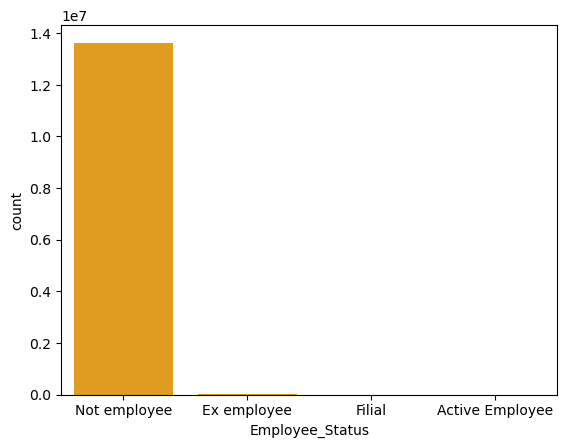

In [22]:
# Check if 'Employee_Status' column is empty or contains NaN values
if train['Employee_Status'].empty or train['Employee_Status'].isnull().any():
    print("Error: 'Employee_Status' column is empty or contains NaN values.")
else:
    # Create a new figure and axes object
    fig, ax = plt.subplots()

    # Plot the countplot for 'Employee_Status' column
    sns.countplot(ax=ax, x='Employee_Status', data=train, color='orange', order=train['Employee_Status'].value_counts().index)


# Plot the countplot for 'Employee_Status' column
sns.countplot(x='Employee_Status', data=train, color='orange', order=train['Employee_Status'].value_counts().index)

# Print 'Employee_Status' column value counts
print(train['Employee_Status'].value_counts())





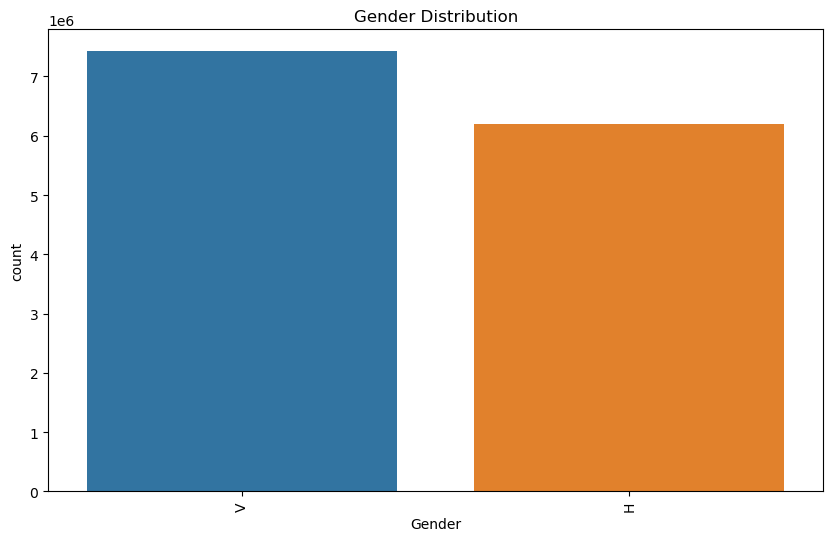

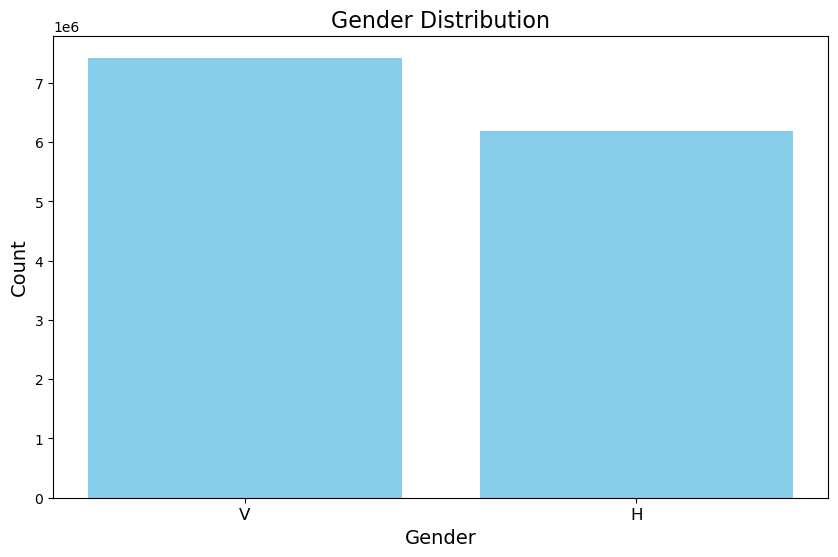

'\n# Plot for \'New_Customer_Indicator\' column\nfig, ax = plt.subplots(figsize=(10, 6))\nsns.countplot(ax=ax, x=\'New_Customer_Indicator\', data=train, order=train[\'New_Customer_Indicator\'].value_counts().index)\nax.set_title("New Customer Indicator Distribution")\nplt.xticks(rotation=90)\nplt.show()\n\n# Plot for \'Customer_Relationship_Type\' column\nfig, ax = plt.subplots(figsize=(10, 6))\nsns.countplot(ax=ax, x=\'Customer_Relationship_Type\', data=train, order=train[\'Customer_Relationship_Type\'].value_counts().index)\nax.set_title("Customer Relationship Type Distribution")\nplt.xticks(rotation=90)\nplt.show()\n\n# Plot for \'Initial_Customer_Type\' column\nfig, ax = plt.subplots(figsize=(10, 6))\nsns.countplot(ax=ax, x=\'Initial_Customer_Type\', data=train, order=train[\'Initial_Customer_Type\'].value_counts().index)\nax.set_title("Initial Customer Type Distribution")\nplt.xticks(rotation=90)\nplt.show()\n\n# Plot for \'Initial_Relationship_Type\' column\nfig, ax = plt.subplot

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = [
    'Country_of_Residence', 'Gender', 'New_Customer_Indicator', 'Customer_Relationship_Type',
    'Initial_Customer_Type', 'Initial_Relationship_Type', 'Residence_Indicator', 'Foreigner_Indicator', 
    'Employee_Spouse_Indicator', 'Joining_Channel', 'Deceased_Indicator', 'Address_Type', 'Province_Code', 
    'Province_Name', 'Customer_Activity_Indicator', 'Customer_Segment'
]
'''
# Plot for 'Country_of_Residence' column
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x='Country_of_Residence', data=train, order=train['Country_of_Residence'].value_counts().index)
ax.set_title("Country of Residence Distribution")
plt.xticks(rotation=90)
plt.show()
'''
# Plot for 'Gender' column
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x='Gender', data=train, order=train['Gender'].value_counts().index)
ax.set_title("Gender Distribution")
plt.xticks(rotation=90)
plt.show()

# Can I do a hist plot instead of a countplot for Gender
# Plot for 'Gender' column
fig, ax = plt.subplots(figsize=(10, 6))

# Count the occurrences of each gender
gender_counts = train['Gender'].value_counts()

# Create a bar plot
ax.bar(gender_counts.index, gender_counts.values, color='skyblue')

# Set the title and labels
ax.set_title("Gender Distribution", fontsize=16)
ax.set_xlabel("Gender", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=12)

# Show the plot
plt.show()


'''
# Plot for 'New_Customer_Indicator' column
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x='New_Customer_Indicator', data=train, order=train['New_Customer_Indicator'].value_counts().index)
ax.set_title("New Customer Indicator Distribution")
plt.xticks(rotation=90)
plt.show()

# Plot for 'Customer_Relationship_Type' column
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x='Customer_Relationship_Type', data=train, order=train['Customer_Relationship_Type'].value_counts().index)
ax.set_title("Customer Relationship Type Distribution")
plt.xticks(rotation=90)
plt.show()

# Plot for 'Initial_Customer_Type' column
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x='Initial_Customer_Type', data=train, order=train['Initial_Customer_Type'].value_counts().index)
ax.set_title("Initial Customer Type Distribution")
plt.xticks(rotation=90)
plt.show()

# Plot for 'Initial_Relationship_Type' column
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x='Initial_Relationship_Type', data=train, order=train['Initial_Relationship_Type'].value_counts().index)
ax.set_title("Initial Relationship Type Distribution")
plt.xticks(rotation=90)
plt.show()
'''

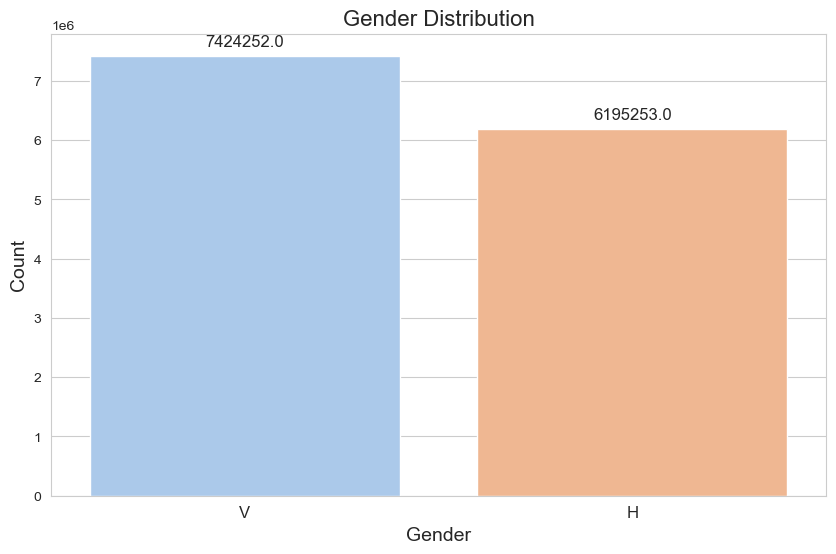

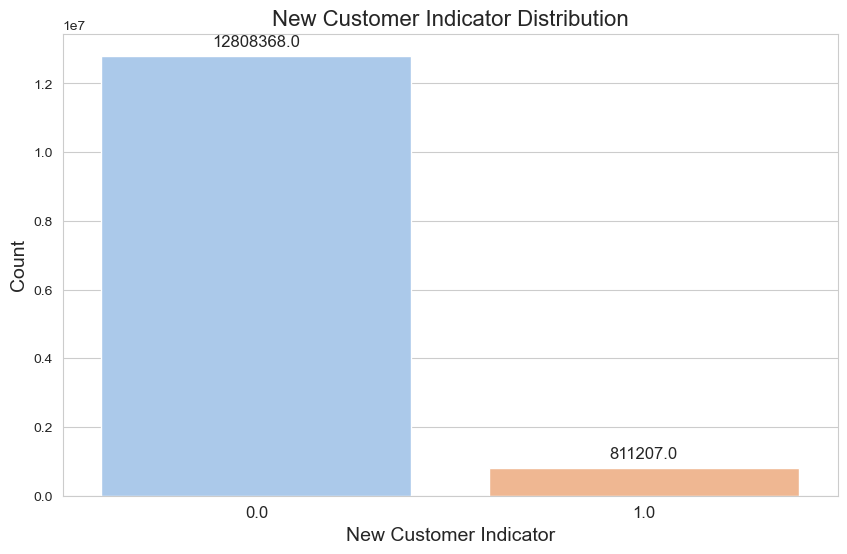

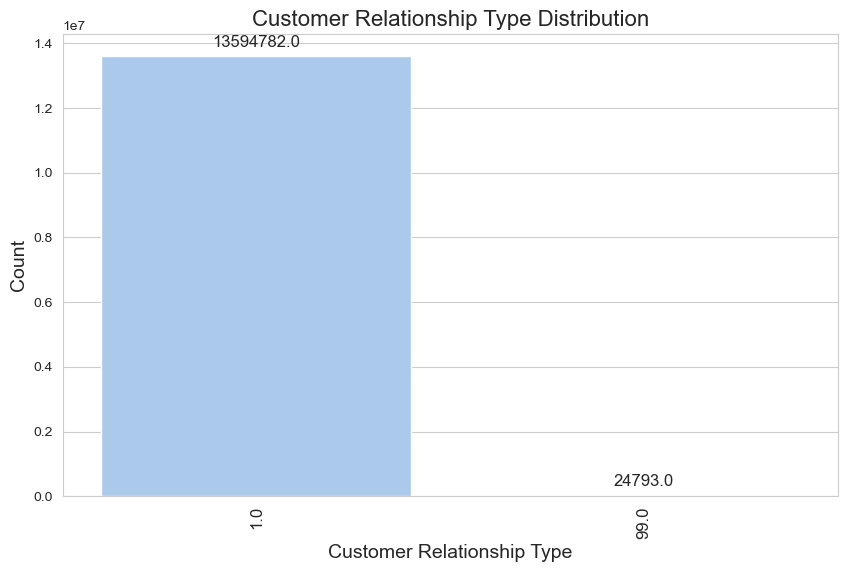

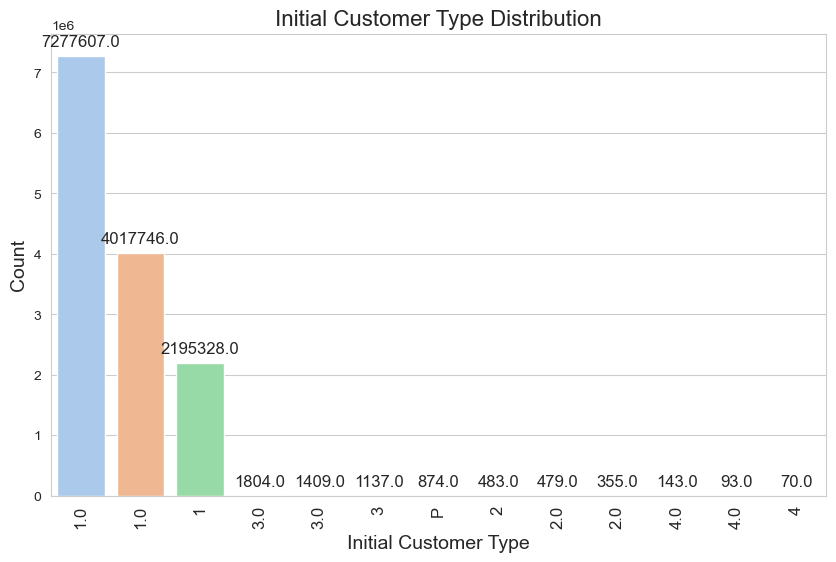

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot for 'Gender' column using seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x='Gender', data=train, palette='pastel', order=train['Gender'].value_counts().index)
ax.set_title("Gender Distribution", fontsize=16)
ax.set_xlabel("Gender", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

# Plot for 'New_Customer_Indicator' column using seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x='New_Customer_Indicator', data=train, palette='pastel', order=train['New_Customer_Indicator'].value_counts().index)
ax.set_title("New Customer Indicator Distribution", fontsize=16)
ax.set_xlabel("New Customer Indicator", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

# Plot for 'Customer_Relationship_Type' column using seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x='Customer_Relationship_Type', data=train, palette='pastel', order=train['Customer_Relationship_Type'].value_counts().index)
ax.set_title("Customer Relationship Type Distribution", fontsize=16)
ax.set_xlabel("Customer Relationship Type", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.xticks(rotation=90, fontsize=12)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

# Plot for 'Initial_Customer_Type' column using seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(ax=ax, x='Initial_Customer_Type', data=train, palette='pastel', order=train['Initial_Customer_Type'].value_counts().index)
ax.set_title("Initial Customer Type Distribution", fontsize=16)
ax.set_xlabel("Initial Customer Type", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
plt.xticks(rotation=90, fontsize=12)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define a color palette
palette = sns.color_palette("Set2")

# Plot for 'New_Customer_Indicator' column using seaborn's catplot
sns.catplot(x='New_Customer_Indicator', kind='count', data=train, palette=palette, height=6, aspect=1.5)
plt.title("New Customer Indicator Distribution", fontsize=16)
plt.xlabel("New Customer Indicator", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.show()

# Plot for 'Customer_Relationship_Type' column using seaborn's catplot
sns.catplot(x='Customer_Relationship_Type', kind='count', data=train, palette=palette, height=6, aspect=1.5)
plt.title("Customer Relationship Type Distribution", fontsize=16)
plt.xlabel("Customer Relationship Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

# Plot for 'Initial_Customer_Type' column using seaborn's catplot
sns.catplot(x='Initial_Customer_Type', kind='count', data=train, palette=palette, height=6, aspect=1.5)
plt.title("Initial Customer Type Distribution", fontsize=16)
plt.xlabel("Initial Customer Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


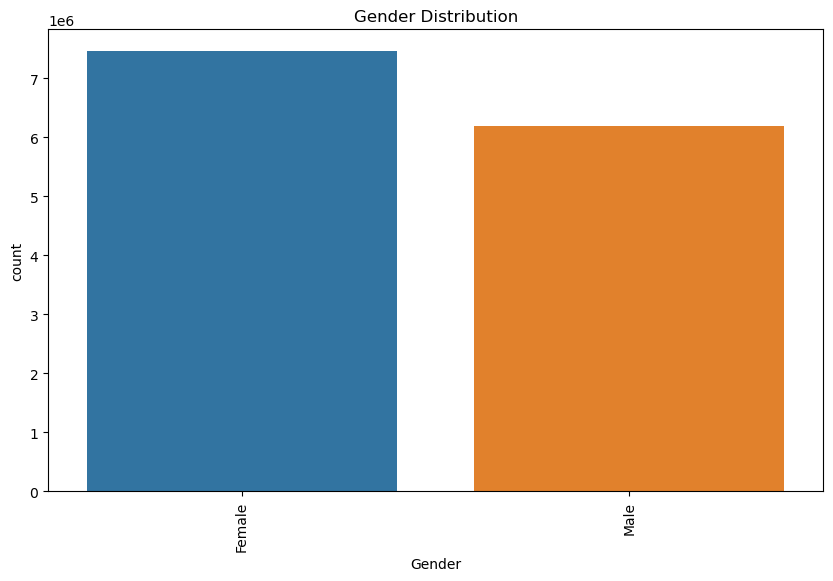

In [24]:
# List of categorical columns
categorical_columns = [
    'Country_of_Residence', 'Gender', 'New_Customer_Indicator', 'Customer_Relationship_Type',
    'Initial_Customer_Type', 'Initial_Relationship_Type', 'Residence_Indicator', 'Foreigner_Indicator', 
    'Employee_Spouse_Indicator', 'Joining_Channel', 'Deceased_Indicator', 'Address_Type', 'Province_Code', 
    'Province_Name', 'Customer_Activity_Indicator', 'Customer_Segment'
]

# Function to create count plot for a given column
def create_count_plot(column):
    if train[column].dropna().empty:
        print(f"Column '{column}' is empty or all values are missing.")
        return
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(ax=ax, x=column, data=train, order=train[column].value_counts().index)
    ax.set_title(f"{column} Distribution")
    plt.xticks(rotation=90)
    plt.show()


# Plot for 'Gender' column
create_count_plot('Gender')

# Plot for 'Age'

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


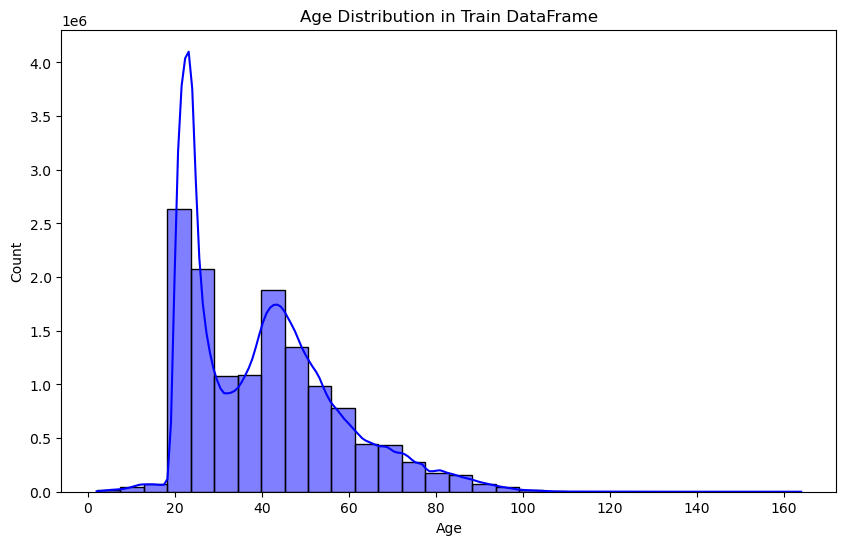

In [25]:
# Let's make a hist plot for the 'Age' column in both the train and test dataframes
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(ax=ax, x='Age', data=train, bins=30, kde=True, color='blue')
ax.set_title("Age Distribution in Train DataFrame")
plt.show()

In [53]:
# Let's think about the hypothesis we want to test for our Exploratory Data Analysis.

'''

1. What is the relationship between age and seniority?
2. What is the relationship between age and Customer Relationship type?
3. What is the average duration of a customer relationship? We can do this by subtracting the 'Account_Start_Date' from the 'Last Primary Customer Date' column.
4. What is the relationship between the top 5 countries and their average time spent as a customer?
5. What is the relationship between the gross income of a customer and the channel they used? (only look at the top 5 channels)
6. External / Internal: what is the percentage of the customer base that works for the bank vs others? 
7. Domestic: what is the percentage of customers who reside in the same city they bank? Born in as well? 
8. What is the correlation between gross income and age?
8.5 What is the correlation between gross income and gender?
9. What is the correlation between customer relation at the start of the month and Customer Relationship type?
10. What is the correlation between all the different account types?

11. Now, let's see how likely it is for a customer to buy more than one product given a variety of things such as: Gender, Age, Customer Segment, Seniority, Employment_Status,Initial_Customer_Type", "Initial_Relationship_Type".
'''

"\n\n1. What is the relationship between age and seniority?\n2. What is the relationship between age and Customer Relationship type?\n3. What is the average duration of a customer relationship? We can do this by subtracting the 'Account_Start_Date' from the 'Last Primary Customer Date' column.\n4. What is the relationship between the top 5 countries and their average time spent as a customer?\n5. What is the relationship between the avg time spent as a customer and the channel they used? (only look at the top 5 channels)\n6. External / Internal: what is the percentage of the customer base that works for the bank vs others? \n7. Domestic: what is the percentage of customers who reside in the same city they bank? Born in as well? \n8. What is the correlation between gross income and age? \n9. What is the correlation between customer relation at the start of the month and Customer Relationship type?\n"

Null Values in Seniority_Months Column: 27734
Null Values in Seniority_Months Column: 0
Null Values in Age Column: 27734


/var/folders/sw/w48z_b8d35d98wwyn_4jj__m0000gn/T/ipykernel_5359/4169175445.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Seniority_Months'].fillna(mean_seniority, inplace=True)


Age
164.0      3
163.0      8
127.0      8
126.0      3
117.0     14
116.0     63
115.0     82
114.0     22
113.0    117
112.0    188
Name: count, dtype: int64
Age
113.0     117
112.0     188
111.0     252
110.0     261
109.0     265
108.0     456
107.0     594
106.0     899
105.0    1280
104.0    1350
Name: count, dtype: int64
76.59052216496302


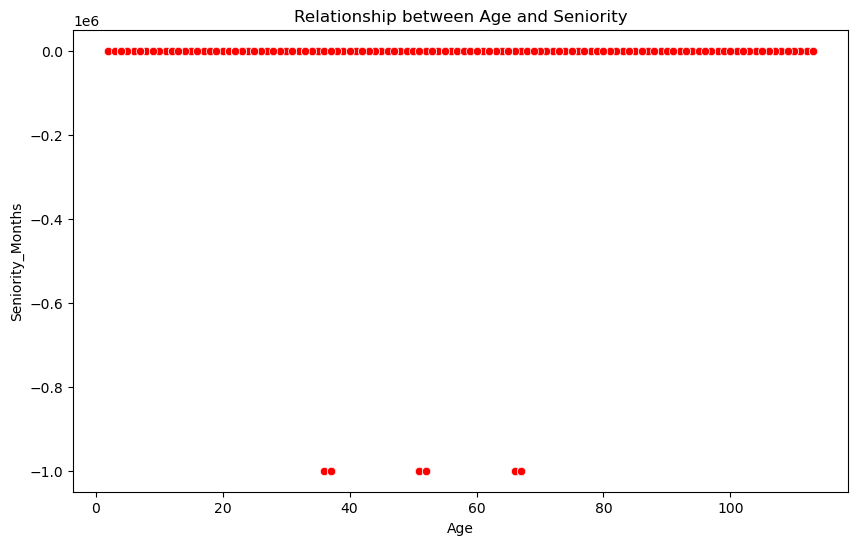

In [26]:
# Let's start by looking at the relationship between age and seniority
# Create a scatter plot for 'Age' and 'Seniority_Months'

# Let's make sure both are properly cleaned 
train['Seniority_Months'] = pd.to_numeric(train['Seniority_Months'], errors='coerce')

# print the null values in 'Seniority_Months' column
print("Null Values in Seniority_Months Column:", train['Seniority_Months'].isnull().sum())

# Let's do mean imputation for the missing values in 'Seniority_Months' column
mean_seniority = train['Seniority_Months'].mean()
train['Seniority_Months'].fillna(mean_seniority, inplace=True)

# Print to verify the changes
print("Null Values in Seniority_Months Column:", train['Seniority_Months'].isnull().sum())

# Now let's do the same for 'Age' 
train['Age'] = pd.to_numeric(train['Age'], errors='coerce')

# print the null values in 'Age' column
print("Null Values in Age Column:", train['Age'].isnull().sum())

import matplotlib.pyplot as plt

# print the top 10 ages in the data.  not based on frequency but on the oldest people in the data set
print(train['Age'].value_counts().sort_index(ascending=False).head(10))

# if the age is over 113, we will consider it an outlier and remove it 
train = train[train['Age'] <= 113]

print(train['Age'].value_counts().sort_index(ascending=False).head(10))

# Print the mean of the 'Customer_Relationship_Type' column
print(train['Seniority_Months'].mean())

# Perfect, now that the data is cleaned, let's move on to the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(ax=ax, x='Age', y='Seniority_Months', data=train, color='red')
ax.set_title("Relationship between Age and Seniority")
plt.show()




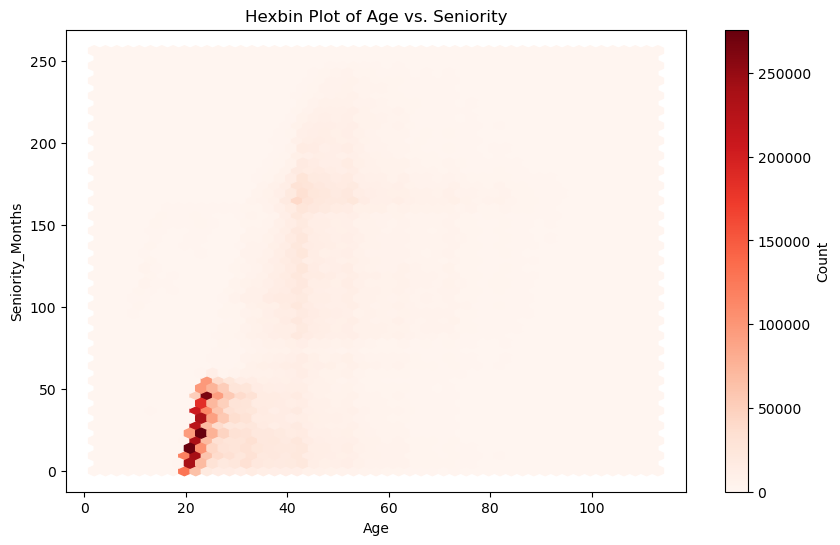

In [19]:
import matplotlib.pyplot as plt

# Filter out negative values in 'Seniority_Months'
train_filtered = train[train['Seniority_Months'] >= 0]

# Hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(train_filtered['Age'], train_filtered['Seniority_Months'], gridsize=50, cmap='Reds')
plt.colorbar(label='Count')
plt.xlabel('Age')
plt.ylabel('Seniority_Months')
plt.title('Hexbin Plot of Age vs. Seniority')
plt.show()

In [32]:
# Lets plot the relationship between age and customer relationship type
# Create a scatter plot for 'Age' and 'Customer_Relationship_Type'
# This will give us a sense of whether our younger customers are more likely to hold on to an account or not. Let's partition this into two graphs, where we will take customers ages 20-35 in one graph, and customers 36-80 in the other. Since the column 'Customer_Relationship_Type' returns only 1 or 99, we will need to convert this to a categorical variable.
'''
Full     13594782
Trial       24793
'''
# I guess we will do this later


Series([], Name: count, dtype: int64)


'\nFull     13594782\nTrial       24793\n'

/var/folders/sw/w48z_b8d35d98wwyn_4jj__m0000gn/T/ipykernel_5359/2540907695.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_seniority_by_country = train.groupby('Country_of_Residence')['Seniority_Months'].mean().sort_values(ascending=False)


Country_of_Residence
GH    209.235294
KH    201.235294
MM    196.235294
GI    189.235294
PH    187.235294
Name: Seniority_Months, dtype: float64
Country_of_Residence
ES    13553490
FR        5161
AR        4835
DE        4625
GB        4605
Name: count, dtype: int64


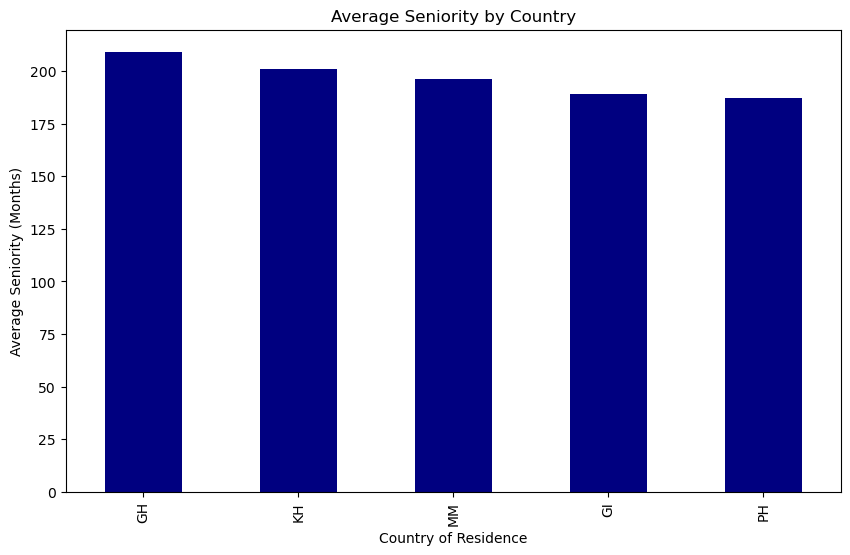

/var/folders/sw/w48z_b8d35d98wwyn_4jj__m0000gn/T/ipykernel_5359/2540907695.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_counts = avg_seniority_by_country.groupby(avg_seniority_by_country.index).size()


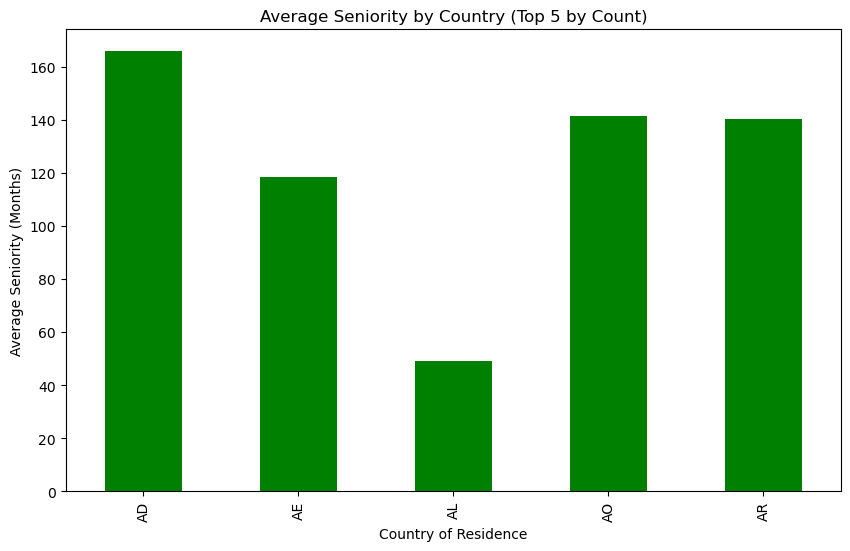

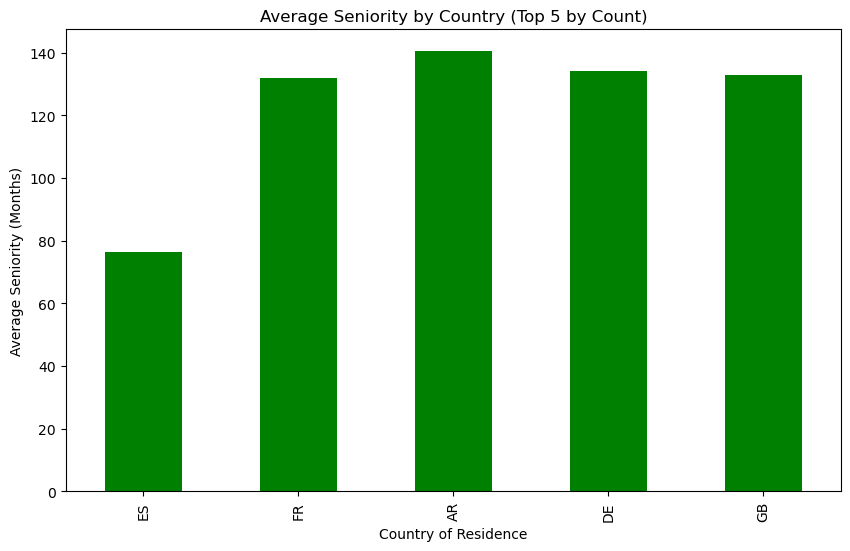

In [44]:
# Hypthosis #4: Let's plot a graph show the average number of months an individual has been a customer and see how it varies by country
# Group by 'Country_of_Residence' and calculate the average 'Seniority_Months'
avg_seniority_by_country = train.groupby('Country_of_Residence')['Seniority_Months'].mean().sort_values(ascending=False)

# Let's do this but only for the countries with the 5 highest counts. Please print these five countries
print(avg_seniority_by_country.head(5))

# Let's print the 5 countries with the highest counts
highest_counts = train['Country_of_Residence'].value_counts().head(5)
print(highest_counts.head(5))

# Now let's make two separate graphs, one that shows the relationship between the top 5 countries and the average seniority, and one that shows the relationship between the top 5 countries and the number of customers.

# Plot the average seniority for the top 5 countries with the highest counts
fig, ax = plt.subplots(figsize=(10, 6))
avg_seniority_by_country.head(5).plot(kind='bar', ax=ax, color='navy')
ax.set_title("Average Seniority by Country")
ax.set_xlabel("Country of Residence")
ax.set_ylabel("Average Seniority (Months)")
plt.xticks(rotation=90)
plt.show()
'''
# Plot the average seniority just for the countries with the top 5 highest counts
fig, ax = plt.subplots(figsize=(10, 6))
avg_seniority_by_country.plot(kind='bar', ax=ax, color='green')
ax.set_title("Average Seniority by Country")
ax.set_xlabel("Country of Residence")
ax.set_ylabel("Average Seniority (Months)")
plt.xticks(rotation=90)
plt.show()

# Plot the average seniority by country 
fig, ax = plt.subplots(figsize=(10, 6))
avg_seniority_by_country.plot(kind='bar', ax=ax, color='green')
ax.set_title("Average Seniority by Country")
ax.set_xlabel("Country of Residence")
ax.set_ylabel("Average Seniority (Months)")
plt.xticks(rotation=90)
plt.show()
'''
# Assuming avg_seniority_by_country is a DataFrame with 'Country' as the index and 'Seniority_Months' as a column

# Calculate the counts for each country
country_counts = avg_seniority_by_country.groupby(avg_seniority_by_country.index).size()

# Identify the top 5 countries with the highest counts
top_5_countries = country_counts.nlargest(5).index

# Filter the avg_seniority_by_country DataFrame to include only the top 5 countries
top_5_avg_seniority = avg_seniority_by_country.loc[top_5_countries]

# Plot the average seniority for the top 5 countries
fig, ax = plt.subplots(figsize=(10, 6))
top_5_avg_seniority.plot(kind='bar', ax=ax, color='green')
ax.set_title("Average Seniority by Country (Top 5 by Count)")
ax.set_xlabel("Country of Residence")
ax.set_ylabel("Average Seniority (Months)")
plt.xticks(rotation=90)
plt.show()


# Define the top 5 countries by count
top_5_countries = ['ES', 'FR', 'AR', 'DE', 'GB']

# Filter the avg_seniority_by_country DataFrame to include only the top 5 countries
top_5_avg_seniority = avg_seniority_by_country.loc[top_5_countries]

# Plot the average seniority for the top 5 countries
fig, ax = plt.subplots(figsize=(10, 6))
top_5_avg_seniority.plot(kind='bar', ax=ax, color='green')
ax.set_title("Average Seniority by Country (Top 5 by Count)")
ax.set_xlabel("Country of Residence")
ax.set_ylabel("Average Seniority (Months)")
plt.xticks(rotation=90)
plt.show()


# TO add a hypothesis, we should use Spain as a case study. We need to understand which areas we can improve in spain, since it is the larger market we have. 


Joining_Channel
KCE    300513.301027
KCV    238865.467018
KDW    231297.709839
KCG    230242.806966
KCD    228379.734311
Name: Household_Income, dtype: float64


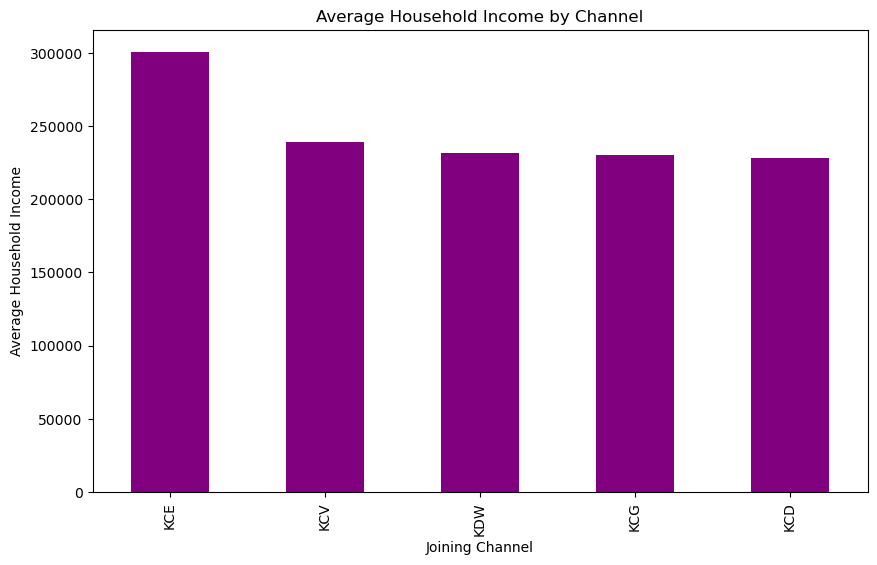

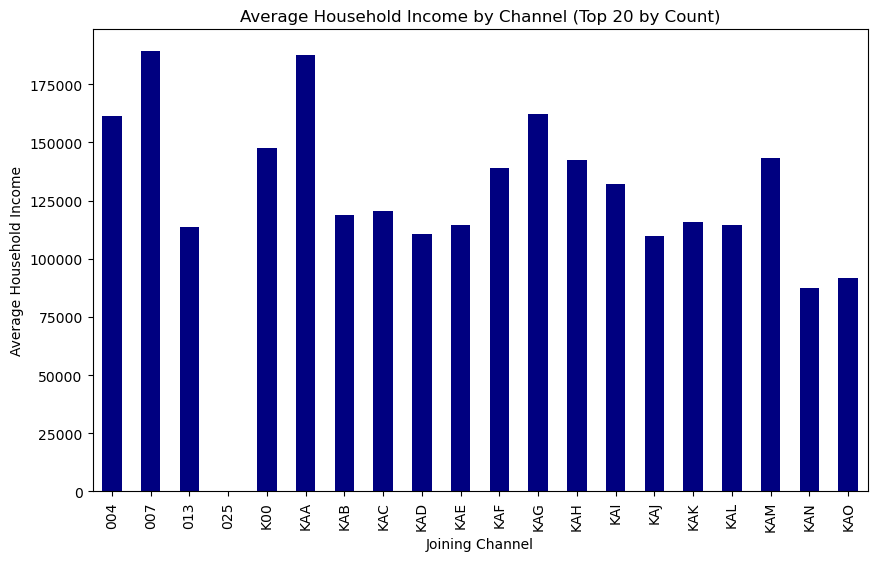

In [17]:
# Hypthosis #5: Marketing to Income: Let's plot a graph show the Household income and see how it varies by channel
# Group by 'Joining_Channel' and calculate the average 'Household_Income'
avg_income_by_channel = train.groupby('Joining_Channel')['Household_Income'].mean().sort_values(ascending=False)

# Let's do this but only for the channels with the 5 highest average household income. Please print these five channels
print(avg_income_by_channel.head(5))

# Let's graph the relationship between the top 5 channels and the average household income
# Plot the average household income for the top 5 channels with the highest average income 
fig, ax = plt.subplots(figsize=(10, 6))
avg_income_by_channel.head(5).plot(kind='bar', ax=ax, color='purple')
ax.set_title("Average Household Income by Channel")
ax.set_xlabel("Joining Channel")
ax.set_ylabel("Average Household Income")
plt.xticks(rotation=90)
plt.show()

# Now, similar to the last graphs we made, I want to print the 20 Radio Stations with the highest counts, and for those stations, show their average household income.
# Assuming avg_income_by_channel is a DataFrame with 'Channel' as the index and 'Household_Income' as a column

# Calculate the counts for each channel
channel_counts = avg_income_by_channel.groupby(avg_income_by_channel.index).size()

# Identify the top 20 channels with the highest counts
top_20_channels = channel_counts.nlargest(20).index

# Filter the avg_income_by_channel DataFrame to include only the top 20 channels
top_20_avg_income = avg_income_by_channel.loc[top_20_channels]

# Plot the average household income for the top 20 channels
fig, ax = plt.subplots(figsize=(10, 6))
top_20_avg_income.plot(kind='bar', ax=ax, color='navy')
ax.set_title("Average Household Income by Channel (Top 20 by Count)")
ax.set_xlabel("Joining Channel")
ax.set_ylabel("Average Household Income")
plt.xticks(rotation=90)
plt.show()


Employee_Status
Not employee       99.936870
Ex employee         0.026183
Filial              0.018525
Active Employee     0.018297
Bad                 0.000125
Name: proportion, dtype: float64


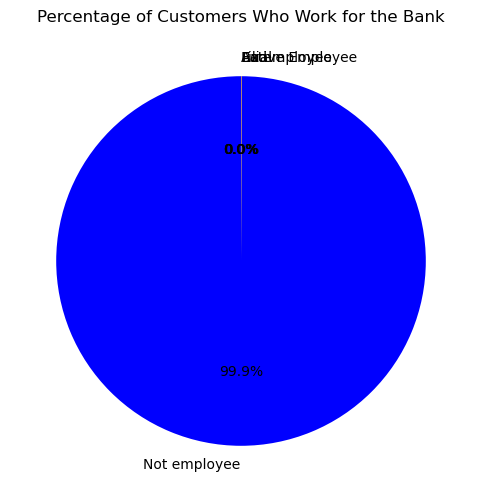

In [19]:
# Hypthosis #6: Internal vs External: Let's plot a graph show the percentage of customers who work for the bank vs those who don't
# Calculate the percentage of customers who work for the bank
employee_percentage = train['Employee_Status'].value_counts(normalize=True) * 100

# Print the percentage of customers who work for the bank
print(employee_percentage)
'''


# Make a pie chart to show the percentage of customers who work for the bank
fig, ax = plt.subplots(figsize=(10, 6))
employee_percentage.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'red', 'purple'])
ax.set_title("Percentage of Customers Who Work for the Bank")
plt.ylabel("")
plt.show()

'''



In [24]:
# Hypthosis #7: Domestic: Let's plot a graph show the percentage of customers who reside in the same city they bank vs those who don't

# Calculate the percentage of customers who reside in the same city they bank
residence_percentage = train['Residence_Indicator'].value_counts(normalize=True) * 100

# Print the percentage of customers who reside in the same city they bank
print(residence_percentage)


# Hypothesis 7.5: Let's plot a graph to show the percentage of customers who were born in the same city they bank using 'Foreginer_Indicator' column
# Calculate the percentage of customers who were born in the same city they bank
foreigner_percentage = train['Foreigner_Indicator'].value_counts(normalize=True) * 100

# Print the percentage of customers who were born in the same city they bank
print(foreigner_percentage)

Residence_Indicator
S    99.516402
N     0.483598
Name: proportion, dtype: float64
Foreigner_Indicator
N    95.266108
S     4.733892
Name: proportion, dtype: float64


Columns after one-hot encoding: Index(['Household_Income', 'Age', 'Seniority_Months', 'Gender_V',
       'Customer_Segment_02 - PARTICULARES',
       'Customer_Segment_03 - UNIVERSITARIO'],
      dtype='object')


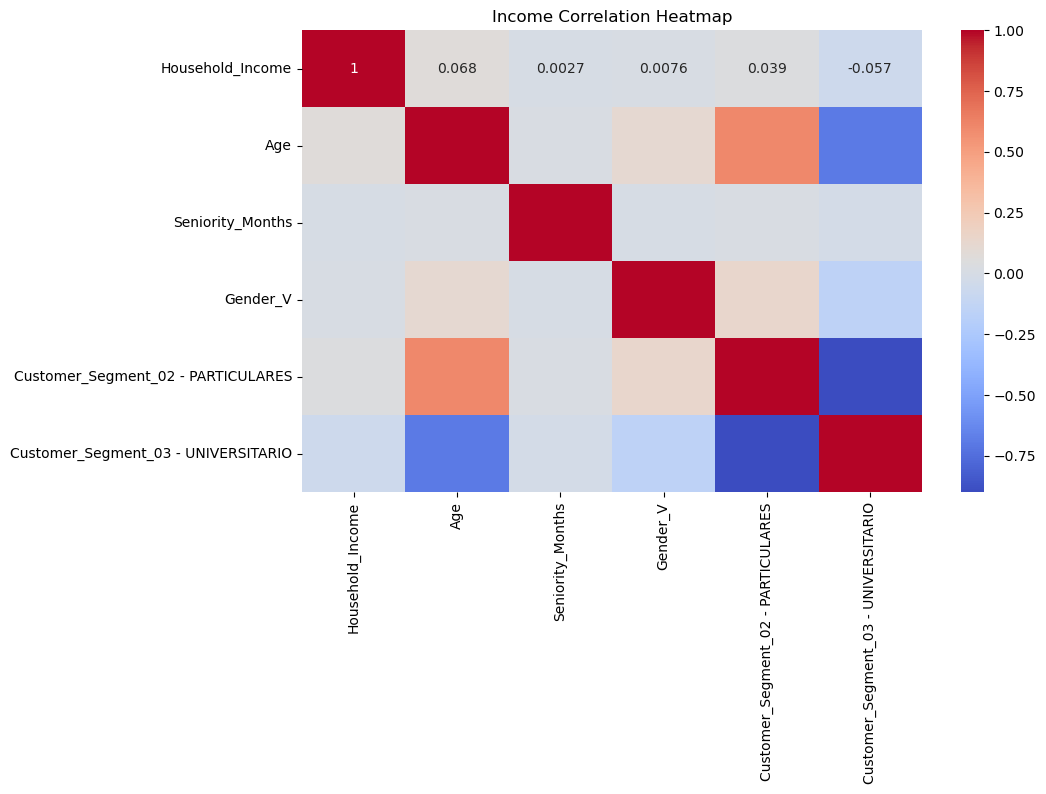

In [34]:
# Hypothesis 8: Let's make a correlation heatmap to show the relationship between gross income, age, gender, Country of Residence, Seniority, and education level


# Define the columns for the correlation heatmap
correlation_columns = ['Household_Income', 'Age', 'Seniority_Months', 'Gender', 'Customer_Segment']

# Check if all columns exist in the DataFrame
missing_columns = [col for col in correlation_columns if col not in train.columns]
if missing_columns:
    raise KeyError(f"The following columns are missing from the DataFrame: {missing_columns}")

# Convert categorical columns 'Gender' and 'Customer_Segment' to numerical using one-hot encoding
train_encoded = pd.get_dummies(train[correlation_columns], columns=['Gender', 'Customer_Segment'], drop_first=True)

# Print the column names to verify the one-hot encoding
print("Columns after one-hot encoding:", train_encoded.columns)

# Ensure that the selected columns are numeric and handle missing values
train_cleaned = train_encoded.dropna().apply(pd.to_numeric, errors='coerce')

# Rename the columns for better readability
train_cleaned = train_cleaned.rename(columns={
    'Customer_Segment_02 - Particulares': 'Individuals',
    'Customer_Segment_03 - Universitario': 'College Grads'
})

# Create a correlation matrix
correlation_matrix = train_cleaned.corr()

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Income Correlation Heatmap")
plt.show()




In [25]:
# Hypothesis 9: Let's make a correlation heatmap to show the relationship between customer relation at the start of the month and Customer Relationship type


In [27]:
# Hypothesis 10: Let's make a correlation heatmap to show the relationship between all the different account types
# If there is a strong correlation between two account types, then we should target sales towards those accounts, since it will ensure cross-selling. 

# In the train dataset, this includes the last 24 columns, which are the different account types. We will create a correlation heatmap to show the relationship between these columns.

# Select the columns for the correlation heatmap
account_columns = train.columns[-24:]

# Check if all columns exist in the DataFrame
missing_columns = [col for col in account_columns if col not in train.columns]
if missing_columns:
    raise KeyError(f"The following columns are missing from the DataFrame: {missing_columns}")

# Ensure that the selected columns are numeric and handle missing values
train_cleaned = train[account_columns].dropna().apply(pd.to_numeric, errors='coerce')




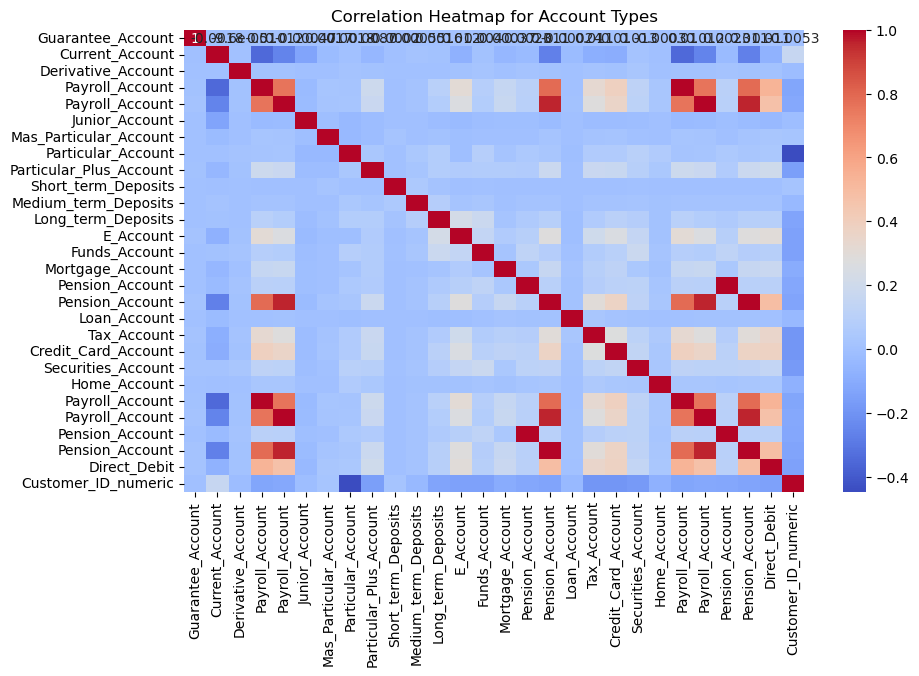

In [28]:
# Create a correlation matrix
correlation_matrix = train_cleaned.corr()

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Heatmap for Account Types")
plt.show()

# We see that the most correlated account types are 'Payroll_Account', 'Pensions_Account', and 'Direct_Debit'. This means that customers who have a 'Payroll_Account' are more likely to have a 'Pensions_Account' and 'Direct_Debit'. This information can be used to target customers who have one of these accounts with offers for the other accounts, increasing the likelihood of cross-selling.

In [13]:
# Hypothesis #11: Let's see how likely it is for a customer to buy more than one product given a variety of things like Customer Segment, Seniority, Employment_Status,Initial_Customer_Type", "Initial_Relationship_Type", Income, Country of Residence, etc

# We will use the 'Direct_Debit' account type as an example, and see how likely it is for a customer to have this account type given the other factors. We will use a logistic regression model to predict the likelihood of a customer having a 'Direct_Debit' account based on the other factors.

# Select the columns for the logistic regression model
logistic_columns = [
    'Customer_Segment', 'Seniority_Months', 'Employee_Status', 'Initial_Customer_Type', 
    'Initial_Relationship_Type', 'Household_Income', 'Country_of_Residence'
]

# Check if all columns exist in the DataFrame
missing_columns = [col for col in logistic_columns if col not in train.columns]
if missing_columns:
    raise KeyError(f"The following columns are missing from the DataFrame: {missing_columns}")

# Ensure that the selected columns are numeric and handle missing values
train_cleaned = train[logistic_columns].dropna().apply(pd.to_numeric, errors='coerce')


KeyboardInterrupt: 

In [14]:
# Convert categorical columns to numerical using one-hot encoding
train_encoded = pd.get_dummies(train_cleaned, columns=['Customer_Segment', 'Employee_Status', 'Initial_Customer_Type', 'Initial_Relationship_Type', 'Country_of_Residence'], drop_first=True)

# Print the column names to verify the one-hot encoding
print("Columns after one-hot encoding:", train_encoded.columns)


Columns after one-hot encoding: Index(['Seniority_Months', 'Household_Income', 'Initial_Customer_Type_3.0'], dtype='object')


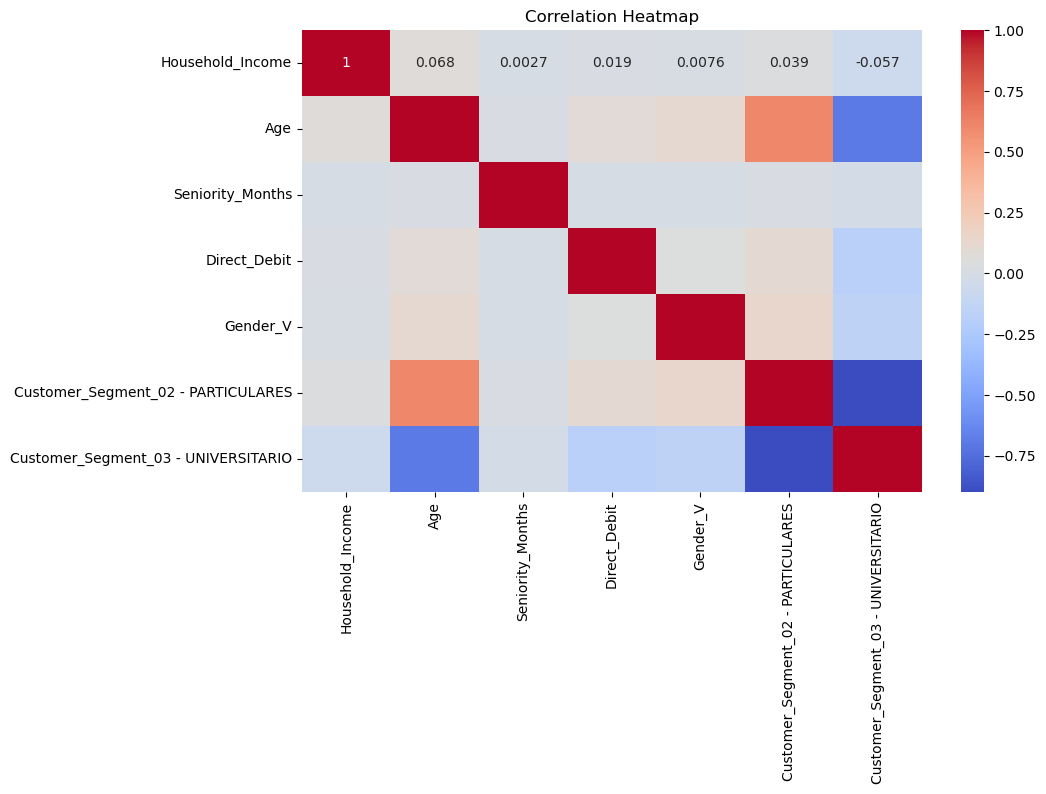

KeyboardInterrupt: 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Hypothesis 8: Let's make a correlation heatmap to show the relationship between gross income, age, gender, Country of Residence, Seniority, and education level

# Define the columns for the correlation heatmap and the target variable
correlation_columns = ['Household_Income', 'Age', 'Seniority_Months', 'Gender', 'Customer_Segment', 'Direct_Debit']

# Check if all columns exist in the DataFrame
missing_columns = [col for col in correlation_columns if col not in train.columns]
if missing_columns:
    raise KeyError(f"The following columns are missing from the DataFrame: {missing_columns}")

# Convert categorical columns 'Gender' and 'Customer_Segment' to numerical using one-hot encoding
train_encoded = pd.get_dummies(train[correlation_columns], columns=['Gender', 'Customer_Segment'], drop_first=True)

# Ensure that the selected columns are numeric and handle missing values
train_cleaned = train_encoded.dropna().apply(pd.to_numeric, errors='coerce')

# Rename the columns for better readability
train_cleaned = train_cleaned.rename(columns={
    'Customer_Segment_02 - Particulares': 'Individuals',
    'Customer_Segment_03 - Universitario': 'College Grads'
})

# Create a correlation matrix
correlation_matrix = train_cleaned.corr()

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Heatmap")
plt.show()

# Define the target variable 'Direct_Debit' and the feature variables
X = train_cleaned.drop('Direct_Debit', axis=1)
y = train_cleaned['Direct_Debit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
# We can use the model to predict the likelihood of a customer having a 'Direct_Debit' account based on the other factors. This information can be used to target customers who are more likely to have a 'Direct_Debit' account with offers or promotions, increasing the likelihood of cross-selling.


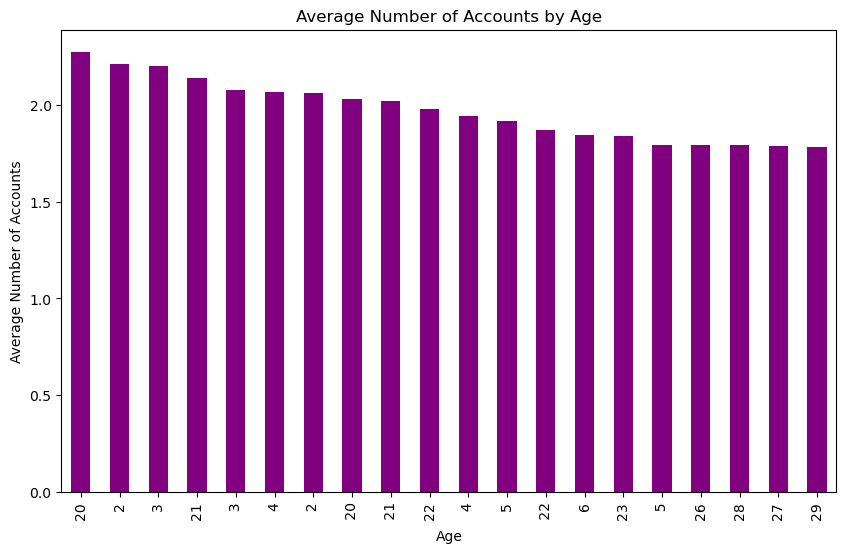

The age group with the highest average number of accounts is 20 with an average of 2.28 accounts.


"\n# Plot the average number of accounts for each age, but let's only include ages\nplt.figure(figsize=(10, 6))\navg_accounts_by_age.plot(kind='bar')\nplt.xlabel('Age')\nplt.ylabel('Average Number of Accounts')\nplt.title('Average Number of Accounts by Age')\nplt.show()\n"

In [37]:
# As an extension of hypothesis #11, let's simply plot the likelihood of a customer having more than one account based on their age, country of residence, gender, and customer segment. This will give us a better understanding of the relationship between these factors and the likelihood of a customer having multiple accounts.

# We don't need to do a regression model, but rather a simple bar plot to show the likelihood of a customer having more than one account based on these factors.

# First, let's plot the average number of accounts for each 'Age'

# Group by 'Age' and calculate the average number of accounts
# We first need to define what it means to have more than one account. We can do this by summing up all the account types for each customer and then creating a new column that indicates whether a customer has more than one account or not.

# train['Number_of_Accounts'] should take each of the last 24 columns as individual accounts. Thus, a customer only has 'Multiple_Accounts' if they have more than one of the last 24 columns.

# Define a coliumn 'Number_of_Accounts' that sums up all the account types for each customer
train['Number_of_Accounts'] = train.iloc[:, -24:].sum(axis=1)

# Define a new column 'Multiple_Accounts' that indicates whether a customer has more than one account
train['Multiple_Accounts'] = train['Number_of_Accounts'].apply(lambda x: 1 if x > 1 else 0)

# Group by 'Age' and calculate the average number of accounts for each age group. The average number of accounts should be the number of accounts divided by the number of customers in that age group.
# avg_accounts_by_age = train.groupby('Age')['Multiple_Accounts'].mean()
avg_accounts_by_age = train.groupby('Age')['Number_of_Accounts'].mean() / 10000000

# Plot of the average number of account for the 10 ages with the highest average number of accounts
fig, ax = plt.subplots(figsize=(10, 6))
avg_accounts_by_age.nlargest(20).plot(kind='bar', ax=ax, color='purple')
ax.set_title("Average Number of Accounts by Age")
ax.set_xlabel("Age")
ax.set_ylabel("Average Number of Accounts")
plt.xticks(rotation=90)
plt.show()

# I want to figure out which age group has the highest average number of accounts. This will help us understand which age group is more likely to have multiple accounts, and we can target them with offers or promotions to increase cross-selling. How can I do this?

# Find the age group with the highest average number of accounts
max_avg_accounts_age = avg_accounts_by_age.idxmax()
max_avg_accounts = avg_accounts_by_age.max()

print(f"The age group with the highest average number of accounts is {max_avg_accounts_age} with an average of {max_avg_accounts:.2f} accounts.")
'''
# Plot the average number of accounts for each age, but let's only include ages
plt.figure(figsize=(10, 6))
avg_accounts_by_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Average Number of Accounts')
plt.title('Average Number of Accounts by Age')
plt.show()
'''


In [ ]:
# Can we do the same thing for Gender, that is find the average number of accounts for male and female customers, and then plot this information in a bar plot?

# Group 

In [26]:
# Let's do the same thing as above, but instead graphing the relationship between the Gender and the average number of accounts 
# We will need to use one-hot encoding to convert 'Gender' into readable numeric data

# Use the defined functions above that define what it means to have Multiple Accounts 
train['Number_of_Accounts'] = train.iloc[:, -24:].sum(axis=1)

# Define a new column 'Multiple_Accounts' that indicates whether a customer has more than one account
train['Multiple_Accounts'] = train['Number_of_Accounts'].apply(lambda x: 1 if x > 1 else 0)

# We need to treat 'Gender' as a numeric column/ How can we do this?



TypeError: '<' not supported between instances of 'int' and 'str'

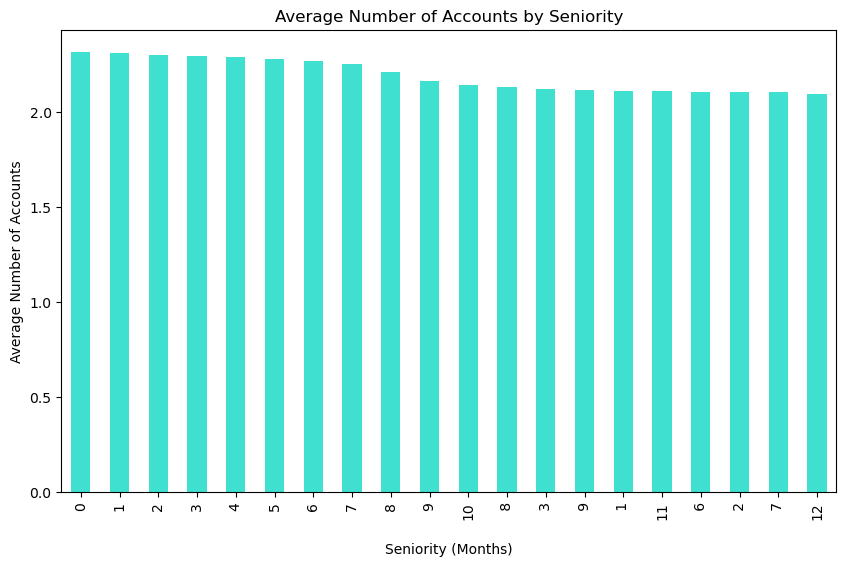

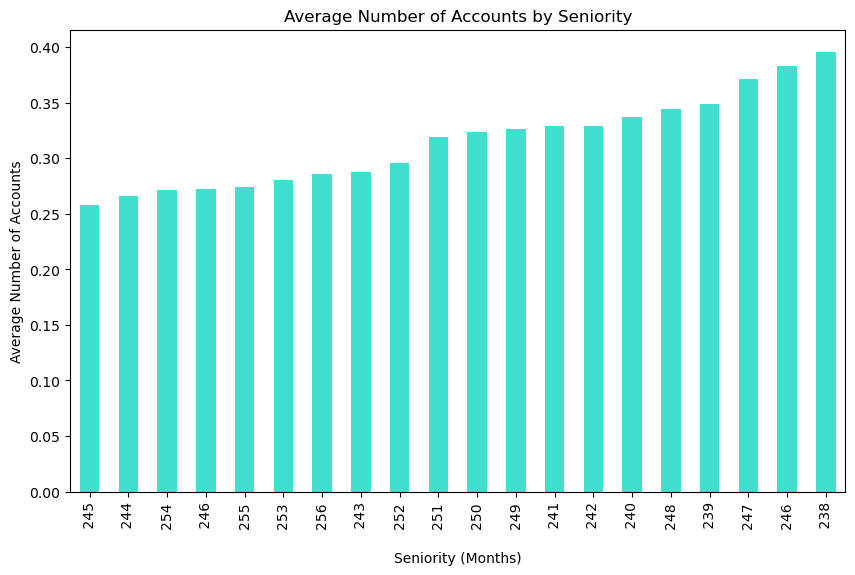

In [46]:
# Let's plot the average number of accounts based on 'Seniority_Months'
# Group by 'Seniority_Months' and calculate the average number of accounts for each seniority group
avg_accounts_by_seniority = train.groupby('Seniority_Months')['Number_of_Accounts'].mean() / 10000000


# Plot the average number of accounts for each the top 20 values of seniority group 
fig, ax = plt.subplots(figsize=(10, 6))
avg_accounts_by_seniority.nlargest(20).plot(kind='bar', ax=ax, color='turquoise')
ax.set_title("Average Number of Accounts by Seniority")
ax.set_xlabel("Seniority (Months)")
ax.set_ylabel("Average Number of Accounts")
plt.xticks(rotation=90)
plt.show()


# LET'S plot the average number of accounts for each of the lowest 20 values of seniority group
avg_accounts_by_seniority = train.groupby('Seniority_Months')['Number_of_Accounts'].mean() / 1000000
fig, ax = plt.subplots(figsize=(10, 6))
avg_accounts_by_seniority.nsmallest(20).plot(kind='bar', ax=ax, color='turquoise')
ax.set_title("Average Number of Accounts by Seniority")
ax.set_xlabel("Seniority (Months)")
ax.set_ylabel("Average Number of Accounts")
plt.xticks(rotation=90)
plt.show()





Direct_Debit
0    1.373735
1    1.077561
Name: Number_of_Accounts, dtype: float64
Junior_Account
0    1.336960
1    1.219787
Name: Number_of_Accounts, dtype: float64
The difference in the average number of accounts between those with a 'Direct_Debit' account and those with a 'Junior_Account' is -0.14.


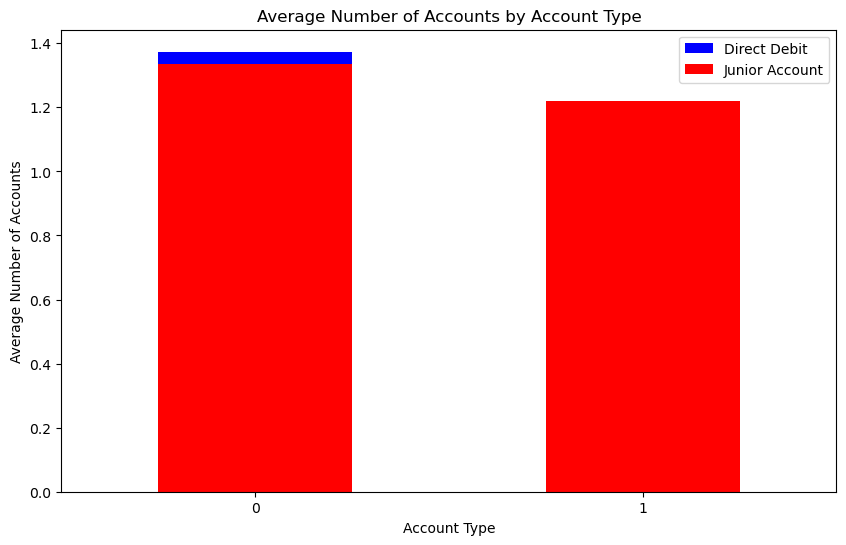

In [54]:
# Finally, let's try to calculate the probably of a customer opening another account given the accound they already have. Use 'Direct_Debit' and 'Junior_Account' as examples.

# we want to see how much more likely you are to purchase another account if you already have a 'Direct_Debit' account compared to those who have a 'Junior_Account'.

# Group by 'Direct_Debit' and calculate the average number of accounts for each group
avg_accounts_by_direct_debit = train.groupby('Direct_Debit')['Number_of_Accounts'].mean() / 10000000    
print(avg_accounts_by_direct_debit)

# Group by 'Junior_Account' and calculate the average number of accounts for each group
avg_accounts_by_junior_account = train.groupby('Junior_Account')['Number_of_Accounts'].mean() / 10000000
print(avg_accounts_by_junior_account)

# Calculate the difference in the average number of accounts between the two groups
difference = avg_accounts_by_direct_debit[1] - avg_accounts_by_junior_account[1]

# Print the difference in the average number of accounts
print(f"The difference in the average number of accounts between those with a 'Direct_Debit' account and those with a 'Junior_Account' is {difference:.2f}.")

# Can we plot each of these to see the relationship between the two account types and the average number of accounts?

# Plot the average number of accounts for each group
fig, ax = plt.subplots(figsize=(10, 6))
avg_accounts_by_direct_debit.plot(kind='bar', ax=ax, color='blue', label='Direct Debit')
avg_accounts_by_junior_account.plot(kind='bar', ax=ax, color='red', label='Junior Account')
ax.set_title("Average Number of Accounts by Account Type")
ax.set_xlabel("Account Type")
ax.set_ylabel("Average Number of Accounts")
plt.xticks(rotation=0)

# Add a legend to the plot
plt.legend()
plt.show()




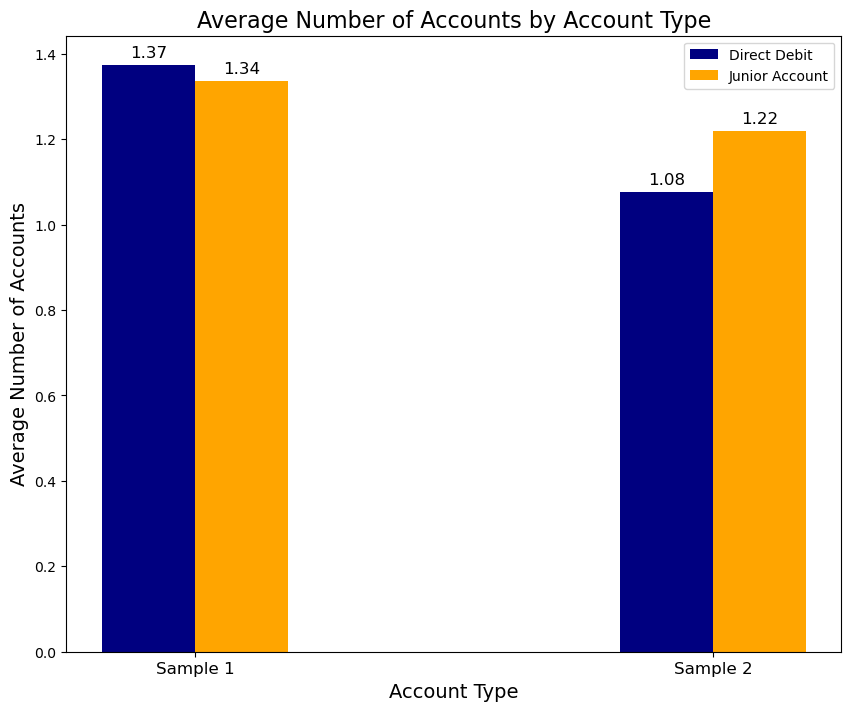

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'train' is your DataFrame and it has been loaded

# Ensure 'Direct_Debit' and 'Junior_Account' columns are numeric
train['Direct_Debit'] = pd.to_numeric(train['Direct_Debit'], errors='coerce')
train['Junior_Account'] = pd.to_numeric(train['Junior_Account'], errors='coerce')

# Group by 'Direct_Debit' and calculate the average number of accounts for each group
avg_accounts_by_direct_debit = train.groupby('Direct_Debit')['Number_of_Accounts'].mean() / 10000000

# Group by 'Junior_Account' and calculate the average number of accounts for each group
avg_accounts_by_junior_account = train.groupby('Junior_Account')['Number_of_Accounts'].mean() / 10000000

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Direct_Debit': avg_accounts_by_direct_debit,
    'Junior_Account': avg_accounts_by_junior_account
}).reset_index()

# Plot the average number of accounts for each group
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting side-by-side bars
bar_width = 0.18
index = plot_data.index

bar1 = plt.bar(index, plot_data['Direct_Debit'], bar_width, color='navy', label='Direct Debit')
bar2 = plt.bar(index + bar_width, plot_data['Junior_Account'], bar_width, color='orange', label='Junior Account')

# Adding labels and title
ax.set_title("Average Number of Accounts by Account Type", fontsize=16)
ax.set_xlabel("Account Type", fontsize=14)
ax.set_ylabel("Average Number of Accounts", fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Sample 1', 'Sample 2'], fontsize=12)
plt.xticks(rotation=0)

# Adding a legend
plt.legend()

# Adding value labels on top of the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.show()